In [55]:
%%html
<style>
    .title {
        font-family: 'Arial', sans-serif;
        font-size: 50px;
        font-weight: bold;
        color: #e74c3c; /* Red color */
        text-align: center;
        padding: 80px;
        background-color: #2c3e50; /* Dark gray background */
        border-radius: 15px;
        margin-bottom: 30px;
        letter-spacing: 2px;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);
        border: 3px solid #e74c3c; /* Red color */
        position: relative; /* Add relative positioning */
    }

    .subtitle {
        font-family: 'Arial', sans-serif;
        font-size: 24px;
        color: #e74c3c; /* Red color */
        text-align: center;
        background-color: #2c3e50; /* Dark gray background */
        border-radius: 10px;
        padding: 10px;
        position: absolute; /* Add absolute positioning */
        bottom: 0; /* Align at the bottom of the title */
        left: 52%; /* Center horizontally */
        transform: translateX(-50%); /* Adjust for centering */
    }
</style>

<div class="title">Los Angeles Crime Data </div>
<div class="subtitle">2010 - 2023</div>



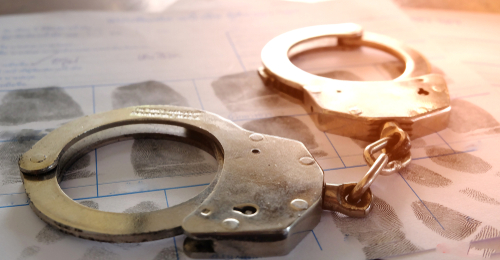


# Dataset Overview

The dataset provide a detailed compilation of crime reports, offering insights into various aspects of reported incidents. It includes information about the time and location of the crimes, details about the victims, and descriptions of the offenses. This dataset can be instrumental in understanding crime patterns and assisting in law enforcement and public safety efforts.

### Columns Description

| Column Name          | Description                                      |
|----------------------|--------------------------------------------------|
| `division_number`    | Numeric code representing the division          |
| `date_reported`      | Date when the crime was reported                 |
| `date_occurred`      | Actual date and time when the crime occurred     |
| `area_name`          | Name of the area where the crime occurred        |
| `reporting_district` | Numeric code of the reporting district           |
| `crime_description`  | Detailed description of the crime                |
| `victim_age`         | Age of the victim                                |
| `victim_sex`         | Gender of the victim                             |
| `victim_descent`     | Ethnic descent of the victim                     |
| `premise_description`| Description of the premise where crime occurred  |
| `weapon_description` | Description of the weapon used                   |
| `status_description` | Detailed status of the crime                     |
| `location`           | General location description of the crime        |
| `latitude`           | Latitude coordinate of the crime location        |
| `longitude`          | Longitude coordinate of the crime location       |

# 1 <span style='border-left: 4px solid maroon; padding-left: 10px;'> Imports  </span>

In [4]:
#pip install plotly
import xlsxwriter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster

# Show plots inside jupyter notebook
%matplotlib inline

In [5]:
# parse_dates=['Date Rptd','DATE OCC'],dayfirst=True) #, date_format='%Y-%m-%d')

df = pd.read_csv('la_crime_2010-2023.csv', parse_dates=['Date Rptd','DATE OCC'],dayfirst=True)
df

<ipython-input-5-6c6f0f9a92cd>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('la_crime_2010-2023.csv', parse_dates=['Date Rptd','DATE OCC'],dayfirst=True)
<ipython-input-5-6c6f0f9a92cd>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('la_crime_2010-2023.csv', parse_dates=['Date Rptd','DATE OCC'],dayfirst=True)


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,AREA
0,1307355,2010-02-20,2010-02-20,1350,13.0,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695,NaN
1,11401303,2010-09-13,2010-12-09,45,14.0,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962,NaN
2,70309629,2010-09-08,2010-09-08,1515,13.0,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524,NaN
3,90631215,2010-05-01,2010-05-01,150,6.0,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295,NaN
4,100100501,2010-03-01,2010-02-01,2100,1.0,Central,176,1,122,"RAPE, ATTEMPTED",...,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993428,231606525,2023-03-22,2023-03-22,1000,NaN,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,Invest Cont,230.0,NaN,NaN,NaN,12800 FILMORE ST,NaN,34.2790,-118.4116,16.0
2993429,231210064,2023-12-04,2023-12-04,1630,NaN,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,Invest Cont,230.0,NaN,NaN,NaN,6100 S VERMONT AV,NaN,33.9841,-118.2915,12.0
2993430,230115220,2023-02-07,2023-01-07,1,NaN,Central,154,1,352,PICKPOCKET,...,Invest Cont,352.0,NaN,NaN,NaN,500 S MAIN ST,NaN,34.0467,-118.2485,1.0
2993431,230906458,2023-05-03,2023-05-03,900,NaN,Van Nuys,914,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,Invest Cont,745.0,NaN,NaN,NaN,14500 HARTLAND ST,NaN,34.1951,-118.4487,9.0


# 2 <span style='border-left: 4px solid maroon; padding-left: 10px;'> Data Check  </span>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2993433 entries, 0 to 2993432
Data columns (total 29 columns):
 #   Column          Dtype         
---  ------          -----         
 0   DR_NO           int64         
 1   Date Rptd       datetime64[ns]
 2   DATE OCC        datetime64[ns]
 3   TIME OCC        int64         
 4   AREA            float64       
 5   AREA NAME       object        
 6   Rpt Dist No     int64         
 7   Part 1-2        int64         
 8   Crm Cd          int64         
 9   Crm Cd Desc     object        
 10  Mocodes         object        
 11  Vict Age        int64         
 12  Vict Sex        object        
 13  Vict Descent    object        
 14  Premis Cd       float64       
 15  Premis Desc     object        
 16  Weapon Used Cd  float64       
 17  Weapon Desc     object        
 18  Status          object        
 19  Status Desc     object        
 20  Crm Cd 1        float64       
 21  Crm Cd 2        float64       
 22  Crm Cd 3        fl

In [5]:
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.float_format', '{:.0f}'.format)

In [6]:
df.describe().transpose()


,count,mean,min,25%,50%,75%,max,std
DR_NO,2993433,169158298,817,131712554,171120978,202005737,910220366,40325121
Date Rptd,2993433,2017-04-19 07:03:14.346626048,2010-01-01 00:00:00,2013-10-10 00:00:00,2017-07-02 00:00:00,2020-11-26 00:00:00,2023-12-11 00:00:00,NaN
DATE OCC,2993433,2017-03-27 10:38:01.237629440,2010-01-01 00:00:00,2013-09-12 00:00:00,2017-06-06 00:00:00,2020-11-03 00:00:00,2023-12-11 00:00:00,NaN
TIME OCC,2993433,1353,1,916,1430,1900,2359,649
AREA,2135775,11,1,6,12,16,21,6
Rpt Dist No,2993433,1147,100,638,1177,1659,2199,604
Part 1-2,2993433,1,1,1,1,2,2,0
Crm Cd,2993433,505,110,330,442,626,956,210
Vict Age,2993433,31,-12,19,31,46,120,21
Premis Cd,2993376,310,101,102,209,501,976,213


In [7]:
df['Vict Age'].value_counts()

Vict Age
 0      590203
 28      65237
 30      65142
 25      65063
 27      64932
         ...  
-8          10
-12          3
-11          1
 118         1
 120         1
Name: count, Length: 113, dtype: int64

In [8]:
#deleting irrelevnt columns

df = df.drop(columns=['AREA','Part 1-2','Crm Cd', 'Mocodes', 'Premis Cd','Weapon Used Cd', 'Status', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street'])

In [9]:
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status Desc,LOCATION,LAT,LON
0,1307355,2010-02-20,2010-02-20,1350,13,Newton,1385,VIOLATION OF COURT ORDER,48,M,H,SINGLE FAMILY DWELLING,NaN,Adult Arrest,300 E GAGE AV,34,-118
1,11401303,2010-09-13,2010-12-09,45,14,Pacific,1485,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",0,M,W,STREET,NaN,Invest Cont,SEPULVEDA BL,34,-118
2,70309629,2010-09-08,2010-09-08,1515,13,Newton,1324,OTHER MISCELLANEOUS CRIME,0,M,H,ALLEY,NaN,Invest Cont,1300 E 21ST ST,34,-118
3,90631215,2010-05-01,2010-05-01,150,6,Hollywood,646,VIOLATION OF COURT ORDER,47,F,W,STREET,HAND GUN,Invest Cont,CAHUENGA BL,34,-118
4,100100501,2010-03-01,2010-02-01,2100,1,Central,176,"RAPE, ATTEMPTED",47,F,H,ALLEY,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,8TH ST,34,-118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993428,231606525,2023-03-22,2023-03-22,1000,NaN,Foothill,1602,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,F,H,SIDEWALK,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,12800 FILMORE ST,34,-118
2993429,231210064,2023-12-04,2023-12-04,1630,NaN,77th Street,1239,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",29,M,B,LAUNDROMAT,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,6100 S VERMONT AV,34,-118
2993430,230115220,2023-02-07,2023-01-07,1,NaN,Central,154,PICKPOCKET,24,F,H,NIGHT CLUB (OPEN EVENINGS ONLY),NaN,Invest Cont,500 S MAIN ST,34,-118
2993431,230906458,2023-05-03,2023-05-03,900,NaN,Van Nuys,914,VANDALISM - MISDEAMEANOR ($399 OR UNDER),53,F,H,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,Invest Cont,14500 HARTLAND ST,34,-118


In [10]:
df['Vict Sex'].value_counts()

Vict Sex
M    1333623
F    1210023
X     134638
H        172
N         17
-          2
Name: count, dtype: int64

In [11]:
#updating null with values

df['Vict Sex'].fillna('unknown' ,inplace = True)


In [12]:
#updating other unknown values to 'unknown'
mask = df['Vict Sex'] == '-'
df.loc[mask, 'Vict Sex'] = 'unknown'

mask_2 = df['Vict Sex'] == 'X'
df.loc[mask_2, 'Vict Sex'] = 'unknown'

mask_3 = df['Vict Sex'] == 'H'
df.loc[mask_3, 'Vict Sex'] = 'unknown'

mask_4 = df['Vict Sex'] == 'N'
df.loc[mask_4, 'Vict Sex'] = 'unknown'

In [13]:
df['Vict Sex'].value_counts()

Vict Sex
M          1333623
F          1210023
unknown     449787
Name: count, dtype: int64

In [14]:
#updating unknown ages to None

mask = df['Vict Age'] <= 0
df.loc[mask, 'Vict Age'] = None

In [15]:
df['Vict Descent'].value_counts()

Vict Descent
H    993563
W    688560
B    457631
O    271326
X    165817
A     70116
K     13705
F      6531
C      4556
I      1809
J      1663
V      1160
Z       614
P       591
U       364
G       154
D        94
S        83
L        80
-         5
Name: count, dtype: int64

In [16]:
#updating null with values
#updating other unknown values to 'unknown'

df['Vict Descent'].fillna('unknown' ,inplace = True)

mask = df['Vict Descent'] == '-'
df.loc[mask, 'Vict Descent'] = 'unknown'

mask_2 = df['Vict Descent'] == 'X'
df.loc[mask_2, 'Vict Descent'] = 'unknown'


In [17]:
df['Vict Descent'].value_counts()

Vict Descent
H          993563
W          688560
unknown    480833
B          457631
O          271326
A           70116
K           13705
F            6531
C            4556
I            1809
J            1663
V            1160
Z             614
P             591
U             364
G             154
D              94
S              83
L              80
Name: count, dtype: int64

In [18]:
#updating null with values

df['Weapon Desc'].fillna('No Weapon' ,inplace = True)

In [19]:
df['Weapon Desc'].value_counts()

Weapon Desc
No Weapon                                         1978415
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)     593685
UNKNOWN WEAPON/OTHER WEAPON                         89621
VERBAL THREAT                                       80891
HAND GUN                                            53090
                                                   ...   
HECKLER & KOCH 91 SEMIAUTOMATIC ASSAULT RIFLE          16
MAC-10 SEMIAUTOMATIC ASSAULT WEAPON                    13
MAC-11 SEMIAUTOMATIC ASSAULT WEAPON                     9
M1-1 SEMIAUTOMATIC ASSAULT RIFLE                        4
M-14 SEMIAUTOMATIC ASSAULT RIFLE                        2
Name: count, Length: 80, dtype: int64

In [20]:
#updating null with values

df['Premis Desc'].fillna('unknown' ,inplace = True)

In [21]:
#check

df.isna().sum()

DR_NO                0
Date Rptd            0
DATE OCC             0
TIME OCC             0
AREA            857658
AREA NAME            0
Rpt Dist No          0
Crm Cd Desc          0
Vict Age        590944
Vict Sex             0
Vict Descent         0
Premis Desc          0
Weapon Desc          0
Status Desc          0
LOCATION             0
LAT                  0
LON                  0
dtype: int64

In [22]:
df['Vict Age'].describe()

count   2402489
mean         39
std          16
min           2
25%          27
50%          36
75%          50
max         120
Name: Vict Age, dtype: float64

In [23]:
#Adding columns

df['Year_OCC'] = df['DATE OCC'].dt.year
df['Month_OCC'] = df['DATE OCC'].dt.month_name()
df['MonthDay_OCC'] = df['DATE OCC'].dt.day
df['DayOfWeekOCC'] = df['DATE OCC'].dt.dayofweek #monday = o sunday = 6

df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd Desc,Vict Age,Vict Sex,...,Premis Desc,Weapon Desc,Status Desc,LOCATION,LAT,LON,Year_OCC,Month_OCC,MonthDay_OCC,DayOfWeekOCC
0,1307355,2010-02-20,2010-02-20,1350,13,Newton,1385,VIOLATION OF COURT ORDER,48,M,...,SINGLE FAMILY DWELLING,No Weapon,Adult Arrest,300 E GAGE AV,34,-118,2010,February,20,5
1,11401303,2010-09-13,2010-12-09,45,14,Pacific,1485,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",NaN,M,...,STREET,No Weapon,Invest Cont,SEPULVEDA BL,34,-118,2010,December,9,3
2,70309629,2010-09-08,2010-09-08,1515,13,Newton,1324,OTHER MISCELLANEOUS CRIME,NaN,M,...,ALLEY,No Weapon,Invest Cont,1300 E 21ST ST,34,-118,2010,September,8,2
3,90631215,2010-05-01,2010-05-01,150,6,Hollywood,646,VIOLATION OF COURT ORDER,47,F,...,STREET,HAND GUN,Invest Cont,CAHUENGA BL,34,-118,2010,May,1,5
4,100100501,2010-03-01,2010-02-01,2100,1,Central,176,"RAPE, ATTEMPTED",47,F,...,ALLEY,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,8TH ST,34,-118,2010,February,1,0


In [24]:
# Converting 'TIME OCC' column to 24-hour display and extracting only the hour part
df['TIME OCC'] = df['TIME OCC'].astype(str).str.zfill(4)
df['TIME OCC'] = df['TIME OCC'].str[:2]

# Check
print(df['TIME OCC'])


0          13
1          00
2          15
3          01
4          21
           ..
2993428    10
2993429    16
2993430    00
2993431    09
2993432    23
Name: TIME OCC, Length: 2993433, dtype: object


In [25]:
# Define time edges and labels
#'Night (00:00-05:59)', 'Morning (06:00-11:59)', 'Afternoon (12:00-17:59)', 'Evening (18:00-23:59)'
time_edges = [0, 6, 12, 18, 24]
time_labels = ['Night', 'Morning', 'Afternoon', 'Evening']

# Create a new column 'time_quarters' with labeled bins
df['time_quarters'] = pd.cut(df['TIME OCC'].astype(int), bins=time_edges, labels=time_labels, right=False)

# Check
print(df[['TIME OCC', 'time_quarters']])


        TIME OCC time_quarters
0             13     Afternoon
1             00         Night
2             15     Afternoon
3             01         Night
4             21       Evening
...          ...           ...
2993428       10       Morning
2993429       16     Afternoon
2993430       00         Night
2993431       09       Morning
2993432       23       Evening

[2993433 rows x 2 columns]


In [26]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd Desc,Vict Age,Vict Sex,...,Weapon Desc,Status Desc,LOCATION,LAT,LON,Year_OCC,Month_OCC,MonthDay_OCC,DayOfWeekOCC,time_quarters
0,1307355,2010-02-20,2010-02-20,13,13,Newton,1385,VIOLATION OF COURT ORDER,48,M,...,No Weapon,Adult Arrest,300 E GAGE AV,34,-118,2010,February,20,5,Afternoon
1,11401303,2010-09-13,2010-12-09,00,14,Pacific,1485,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",NaN,M,...,No Weapon,Invest Cont,SEPULVEDA BL,34,-118,2010,December,9,3,Night
2,70309629,2010-09-08,2010-09-08,15,13,Newton,1324,OTHER MISCELLANEOUS CRIME,NaN,M,...,No Weapon,Invest Cont,1300 E 21ST ST,34,-118,2010,September,8,2,Afternoon
3,90631215,2010-05-01,2010-05-01,01,6,Hollywood,646,VIOLATION OF COURT ORDER,47,F,...,HAND GUN,Invest Cont,CAHUENGA BL,34,-118,2010,May,1,5,Night
4,100100501,2010-03-01,2010-02-01,21,1,Central,176,"RAPE, ATTEMPTED",47,F,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,8TH ST,34,-118,2010,February,1,0,Evening


## Question 1

### What is the ethnic and gender identity of recurring crime victims divided by ares?

In [27]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd Desc,Vict Age,Vict Sex,...,Weapon Desc,Status Desc,LOCATION,LAT,LON,Year_OCC,Month_OCC,MonthDay_OCC,DayOfWeekOCC,time_quarters
0,1307355,2010-02-20,2010-02-20,13,13,Newton,1385,VIOLATION OF COURT ORDER,48,M,...,No Weapon,Adult Arrest,300 E GAGE AV,34,-118,2010,February,20,5,Afternoon
1,11401303,2010-09-13,2010-12-09,00,14,Pacific,1485,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",NaN,M,...,No Weapon,Invest Cont,SEPULVEDA BL,34,-118,2010,December,9,3,Night
2,70309629,2010-09-08,2010-09-08,15,13,Newton,1324,OTHER MISCELLANEOUS CRIME,NaN,M,...,No Weapon,Invest Cont,1300 E 21ST ST,34,-118,2010,September,8,2,Afternoon
3,90631215,2010-05-01,2010-05-01,01,6,Hollywood,646,VIOLATION OF COURT ORDER,47,F,...,HAND GUN,Invest Cont,CAHUENGA BL,34,-118,2010,May,1,5,Night
4,100100501,2010-03-01,2010-02-01,21,1,Central,176,"RAPE, ATTEMPTED",47,F,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,8TH ST,34,-118,2010,February,1,0,Evening


In [28]:
df['Vict Sex'].value_counts()

Vict Sex
M          1333623
F          1210023
unknown     449787
Name: count, dtype: int64

In [29]:
#vic_sex_area['DR_NO'].count()


In [30]:
df['AREA NAME'].value_counts()

AREA NAME
77th Street    199626
Southwest      183783
Pacific        163041
N Hollywood    157999
Central        156659
Southeast      155215
Hollywood      144482
Newton         143229
Olympic        140546
Devonshire     138429
Northeast      137438
Mission        136417
Van Nuys       136185
Topanga        132661
Rampart        130184
Wilshire       129761
West LA        128819
Harbor         127427
West Valley    125961
Foothill       115370
Hollenbeck     110201
Name: count, dtype: int64

In [31]:
df['Vict Sex'].value_counts()
mask_vict_gender = df['Vict Sex'] != 'unknown'
df[mask_vict_gender]

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd Desc,Vict Age,Vict Sex,...,Weapon Desc,Status Desc,LOCATION,LAT,LON,Year_OCC,Month_OCC,MonthDay_OCC,DayOfWeekOCC,time_quarters
0,1307355,2010-02-20,2010-02-20,13,13,Newton,1385,VIOLATION OF COURT ORDER,48,M,...,No Weapon,Adult Arrest,300 E GAGE AV,34,-118,2010,February,20,5,Afternoon
1,11401303,2010-09-13,2010-12-09,00,14,Pacific,1485,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",NaN,M,...,No Weapon,Invest Cont,SEPULVEDA BL,34,-118,2010,December,9,3,Night
2,70309629,2010-09-08,2010-09-08,15,13,Newton,1324,OTHER MISCELLANEOUS CRIME,NaN,M,...,No Weapon,Invest Cont,1300 E 21ST ST,34,-118,2010,September,8,2,Afternoon
3,90631215,2010-05-01,2010-05-01,01,6,Hollywood,646,VIOLATION OF COURT ORDER,47,F,...,HAND GUN,Invest Cont,CAHUENGA BL,34,-118,2010,May,1,5,Night
4,100100501,2010-03-01,2010-02-01,21,1,Central,176,"RAPE, ATTEMPTED",47,F,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,8TH ST,34,-118,2010,February,1,0,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993428,231606525,2023-03-22,2023-03-22,10,NaN,Foothill,1602,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,F,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,12800 FILMORE ST,34,-118,2023,March,22,2,Morning
2993429,231210064,2023-12-04,2023-12-04,16,NaN,77th Street,1239,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",29,M,...,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,6100 S VERMONT AV,34,-118,2023,December,4,0,Afternoon
2993430,230115220,2023-02-07,2023-01-07,00,NaN,Central,154,PICKPOCKET,24,F,...,No Weapon,Invest Cont,500 S MAIN ST,34,-118,2023,January,7,5,Night
2993431,230906458,2023-05-03,2023-05-03,09,NaN,Van Nuys,914,VANDALISM - MISDEAMEANOR ($399 OR UNDER),53,F,...,No Weapon,Invest Cont,14500 HARTLAND ST,34,-118,2023,May,3,2,Morning


In [32]:
df['Vict Descent'].value_counts()

Vict Descent
H          993563
W          688560
unknown    480833
B          457631
O          271326
A           70116
K           13705
F            6531
C            4556
I            1809
J            1663
V            1160
Z             614
P             591
U             364
G             154
D              94
S              83
L              80
Name: count, dtype: int64

In [33]:
mask_descent=df['Vict Descent'].isin(['H','W','B','unknown','O'])
df[mask_descent]

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd Desc,Vict Age,Vict Sex,...,Weapon Desc,Status Desc,LOCATION,LAT,LON,Year_OCC,Month_OCC,MonthDay_OCC,DayOfWeekOCC,time_quarters
0,1307355,2010-02-20,2010-02-20,13,13,Newton,1385,VIOLATION OF COURT ORDER,48,M,...,No Weapon,Adult Arrest,300 E GAGE AV,34,-118,2010,February,20,5,Afternoon
1,11401303,2010-09-13,2010-12-09,00,14,Pacific,1485,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",NaN,M,...,No Weapon,Invest Cont,SEPULVEDA BL,34,-118,2010,December,9,3,Night
2,70309629,2010-09-08,2010-09-08,15,13,Newton,1324,OTHER MISCELLANEOUS CRIME,NaN,M,...,No Weapon,Invest Cont,1300 E 21ST ST,34,-118,2010,September,8,2,Afternoon
3,90631215,2010-05-01,2010-05-01,01,6,Hollywood,646,VIOLATION OF COURT ORDER,47,F,...,HAND GUN,Invest Cont,CAHUENGA BL,34,-118,2010,May,1,5,Night
4,100100501,2010-03-01,2010-02-01,21,1,Central,176,"RAPE, ATTEMPTED",47,F,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,8TH ST,34,-118,2010,February,1,0,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993428,231606525,2023-03-22,2023-03-22,10,NaN,Foothill,1602,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,F,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,12800 FILMORE ST,34,-118,2023,March,22,2,Morning
2993429,231210064,2023-12-04,2023-12-04,16,NaN,77th Street,1239,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",29,M,...,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,6100 S VERMONT AV,34,-118,2023,December,4,0,Afternoon
2993430,230115220,2023-02-07,2023-01-07,00,NaN,Central,154,PICKPOCKET,24,F,...,No Weapon,Invest Cont,500 S MAIN ST,34,-118,2023,January,7,5,Night
2993431,230906458,2023-05-03,2023-05-03,09,NaN,Van Nuys,914,VANDALISM - MISDEAMEANOR ($399 OR UNDER),53,F,...,No Weapon,Invest Cont,14500 HARTLAND ST,34,-118,2023,May,3,2,Morning


In [34]:

df_piv_mask = df[mask_descent & mask_vict_gender]
df_piv_mask


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd Desc,Vict Age,Vict Sex,...,Weapon Desc,Status Desc,LOCATION,LAT,LON,Year_OCC,Month_OCC,MonthDay_OCC,DayOfWeekOCC,time_quarters
0,1307355,2010-02-20,2010-02-20,13,13,Newton,1385,VIOLATION OF COURT ORDER,48,M,...,No Weapon,Adult Arrest,300 E GAGE AV,34,-118,2010,February,20,5,Afternoon
1,11401303,2010-09-13,2010-12-09,00,14,Pacific,1485,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",NaN,M,...,No Weapon,Invest Cont,SEPULVEDA BL,34,-118,2010,December,9,3,Night
2,70309629,2010-09-08,2010-09-08,15,13,Newton,1324,OTHER MISCELLANEOUS CRIME,NaN,M,...,No Weapon,Invest Cont,1300 E 21ST ST,34,-118,2010,September,8,2,Afternoon
3,90631215,2010-05-01,2010-05-01,01,6,Hollywood,646,VIOLATION OF COURT ORDER,47,F,...,HAND GUN,Invest Cont,CAHUENGA BL,34,-118,2010,May,1,5,Night
4,100100501,2010-03-01,2010-02-01,21,1,Central,176,"RAPE, ATTEMPTED",47,F,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,8TH ST,34,-118,2010,February,1,0,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993428,231606525,2023-03-22,2023-03-22,10,NaN,Foothill,1602,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,F,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,12800 FILMORE ST,34,-118,2023,March,22,2,Morning
2993429,231210064,2023-12-04,2023-12-04,16,NaN,77th Street,1239,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",29,M,...,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,6100 S VERMONT AV,34,-118,2023,December,4,0,Afternoon
2993430,230115220,2023-02-07,2023-01-07,00,NaN,Central,154,PICKPOCKET,24,F,...,No Weapon,Invest Cont,500 S MAIN ST,34,-118,2023,January,7,5,Night
2993431,230906458,2023-05-03,2023-05-03,09,NaN,Van Nuys,914,VANDALISM - MISDEAMEANOR ($399 OR UNDER),53,F,...,No Weapon,Invest Cont,14500 HARTLAND ST,34,-118,2023,May,3,2,Morning


In [35]:
#creating pivot table

piv1 = df_piv_mask.pivot_table(index = 'AREA NAME',
                columns = ['Vict Sex', 'Vict Descent'],
              values = 'DR_NO',
              aggfunc = 'count')
piv1

Vict Sex          F                                  M                       \
Vict Descent      B      H     O      W unknown      B      H      O      W   
AREA NAME                                                                     
77th Street   56336  35143  1300   2243     189  32908  32667   3001   3801   
Central       15371  18685  5065  12202     176  20577  28140  10898  20370   
Devonshire     4332  18128  6888  20927     325   4039  17169   9976  24313   
Foothill       3061  29334  3231   9594      92   2596  26659   8513  13033   
Harbor         7165  26965  2520  12541     141   4815  22710   7576  13920   
Hollenbeck     1870  35653  1117   2845     186   1692  30247   1748   7925   
Hollywood      7054  13301  5406  22713     262   9589  16182  11015  30233   
Mission        4019  40616  2907   7436     165   3193  35519   9652   9078   
N Hollywood    6173  21129  6277  24981     158   6265  20190  16346  36079   
Newton        15025  37167  1357   2516      85  10556  40901   4358   5754   
Northeast      2604  25109  4181  17370     149   2862  23292   8902  24177   
Olympic        7140  26097  5561   6722     198   6576  25379   7606   8770   
Pacific        9266  10946  6662  29131     281   8434  12741   8908  38927   
Rampart        7817  30195  3869   7705     131   6459  31816   5571  10068   
Southeast     40484  32355   892   1493     161  20349  27353   2435   2010   
Southwest     42646  28063  2817   6820     376  27539  26923   4264   8935   
Topanga        5291  16539  6982  21863     235   4215  15893   9428  27688   
Van Nuys       5846  20982  6573  20874     260   5240  19722   9511  24685   
West LA        4047   6543  7659  29124     194   3954   7361  12035  31131   
West Valley    4069  17582  7611  18982      50   3636  15922  14857  27948   
Wilshire      12291  12311  5324  18785     132  10057  13679  10394  22573   

Vict Sex              
Vict Descent unknown  
AREA NAME             
77th Street      438  
Central          531  
Devonshire      1280  
Foothill        1041  
Harbor          1359  
Hollenbeck      1886  
Hollywood       1078  
Mission         1500  
N Hollywood      432  
Newton           169  
Northeast        279  
Olympic          318  
Pacific         2398  
Rampart          168  
Southeast        401  
Southwest       1583  
Topanga        10105  
Van Nuys        1281  
West LA          320  
West Valley      165  
Wilshire        1335

In [36]:
piv1_percentages = piv1.div(piv1.sum(axis=1), axis=0) * 100
piv1_percentages

Vict Sex      F                  M                 
Vict Descent  B  H O  W unknown  B  H  O  W unknown
AREA NAME                                          
77th Street  34 21 1  1       0 20 19  2  2       0
Central      12 14 4  9       0 16 21  8 15       0
Devonshire    4 17 6 19       0  4 16  9 23       1
Foothill      3 30 3 10       0  3 27  9 13       1
Harbor        7 27 3 13       0  5 23  8 14       1
Hollenbeck    2 42 1  3       0  2 36  2  9       2
Hollywood     6 11 5 19       0  8 14  9 26       1
Mission       4 36 3  7       0  3 31  8  8       1
N Hollywood   4 15 5 18       0  5 15 12 26       0
Newton       13 32 1  2       0  9 35  4  5       0
Northeast     2 23 4 16       0  3 21  8 22       0
Olympic       8 28 6  7       0  7 27  8  9       0
Pacific       7  9 5 23       0  7 10  7 30       2
Rampart       8 29 4  7       0  6 31  5 10       0
Southeast    32 25 1  1       0 16 21  2  2       0
Southwest    28 19 2  5       0 18 18  3  6       1
Topanga       4 14 6 18       0  4 13  8 23       9
Van Nuys      5 18 6 18       0  5 17  8 21       1
West LA       4  6 7 28       0  4  7 12 30       0
West Valley   4 16 7 17       0  3 14 13 25       0
Wilshire     11 12 5 18       0  9 13 10 21       1

<Figure size 864x432 with 0 Axes>

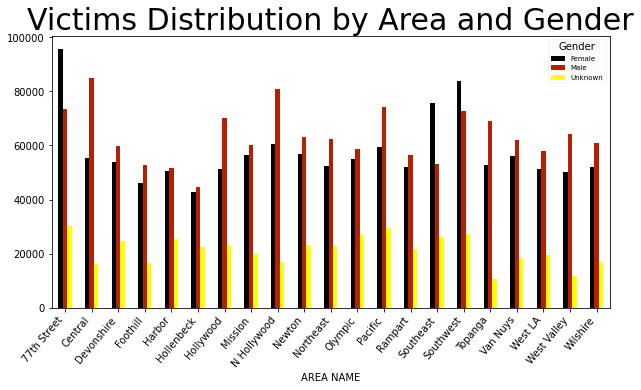

In [37]:
#creating pivot table

piv_gender_area = df.pivot_table(index = 'AREA NAME',
                columns = 'Vict Sex',
              values = 'DR_NO',
              aggfunc = 'count')

plt.figure(figsize=(12,6))
ax= piv_gender_area.plot.bar(
                          #xlabel = '\nArea',
                         title = 'Victims dustribution by area and gender',
                         figsize = (10, 5),
                        colormap='gnuplot')
ax.set_title('Victims Distribution by Area and Gender', fontsize=30)

plt.legend(loc='best', 
           labels=['Female', 'Male', 'Unknown'],
           framealpha=0.2, 
           facecolor='0.94',
           fontsize=7,
           title='Gender')
plt.xticks(rotation = 50, ha = 'right')
plt.show()

In [38]:
descent_mapping = {
                    'A': 'Other Asian',
                    'B': 'Black',
                    'C': 'Chinese',
                    'D': 'Cambodian',
                    'F': 'Filipino',
                    'G': 'Guamanian',
                    'H': 'Hispanic/Latin/Mexican',
                    'I': 'American Indian/Alaskan Native',
                    'J': 'Japanese',
                    'K': 'Korean',
                    'L': 'Laotian',
                    'O': 'Other',
                    'P': 'Pacific Islander',
                    'S': 'Samoan',
                    'U': 'Hawaiian',
                    'V': 'Vietnamese',
                    'W': 'White',
                    'X': 'Unknown',
                    'Z': 'Asian Indian'
                }
# Create the new column Vict Descent based on Descent Code
# .map() - pandas function that transform values in a Series or DataFrame based on a mapping or a function.
df['Vict Descent Name'] = df['Vict Descent'].map(descent_mapping)

<Figure size 864x432 with 0 Axes>

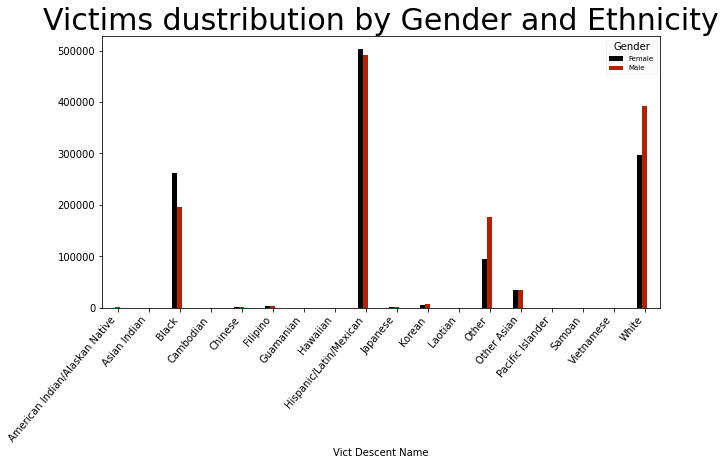

In [39]:
piv_gender_decent = df.pivot_table(index = 'Vict Descent Name',
                columns = 'Vict Sex',
              values = 'DR_NO',
              aggfunc = 'count')

plt.figure(figsize=(12,6))
piv_gender_decent.plot.bar(
                           title = 'Victims dustribution by gender and ethnicity',
                           figsize = (10, 5),
                           colormap='gnuplot'
                          ).set_title('Victims dustribution by Gender and Ethnicity', fontsize=30)

plt.legend(loc='best', 
           labels=['Female', 'Male'],
           framealpha=0.2, 
           facecolor='0.94',
           fontsize=7,
           title='Gender')
plt.xticks(rotation = 50, ha = 'right')
plt.show()

In [40]:
mask_descent=df['Vict Descent'].isin(['H','W','B','O'])
df_piv_mask = df[mask_descent & mask_vict_gender]

piv1_1 = df_piv_mask.pivot_table(index = 'AREA NAME',
                columns = ['Vict Sex', 'Vict Descent'],
              values = 'DR_NO',
              aggfunc = 'count')
piv1_1

#without 'unknown' values. not adding relenent information.

Vict Sex          F                          M                     
Vict Descent      B      H     O      W      B      H      O      W
AREA NAME                                                          
77th Street   56336  35143  1300   2243  32908  32667   3001   3801
Central       15371  18685  5065  12202  20577  28140  10898  20370
Devonshire     4332  18128  6888  20927   4039  17169   9976  24313
Foothill       3061  29334  3231   9594   2596  26659   8513  13033
Harbor         7165  26965  2520  12541   4815  22710   7576  13920
Hollenbeck     1870  35653  1117   2845   1692  30247   1748   7925
Hollywood      7054  13301  5406  22713   9589  16182  11015  30233
Mission        4019  40616  2907   7436   3193  35519   9652   9078
N Hollywood    6173  21129  6277  24981   6265  20190  16346  36079
Newton        15025  37167  1357   2516  10556  40901   4358   5754
Northeast      2604  25109  4181  17370   2862  23292   8902  24177
Olympic        7140  26097  5561   6722   6576  25379   7606   8770
Pacific        9266  10946  6662  29131   8434  12741   8908  38927
Rampart        7817  30195  3869   7705   6459  31816   5571  10068
Southeast     40484  32355   892   1493  20349  27353   2435   2010
Southwest     42646  28063  2817   6820  27539  26923   4264   8935
Topanga        5291  16539  6982  21863   4215  15893   9428  27688
Van Nuys       5846  20982  6573  20874   5240  19722   9511  24685
West LA        4047   6543  7659  29124   3954   7361  12035  31131
West Valley    4069  17582  7611  18982   3636  15922  14857  27948
Wilshire      12291  12311  5324  18785  10057  13679  10394  22573

Text(159.0, 0.5, 'AREA NAME')

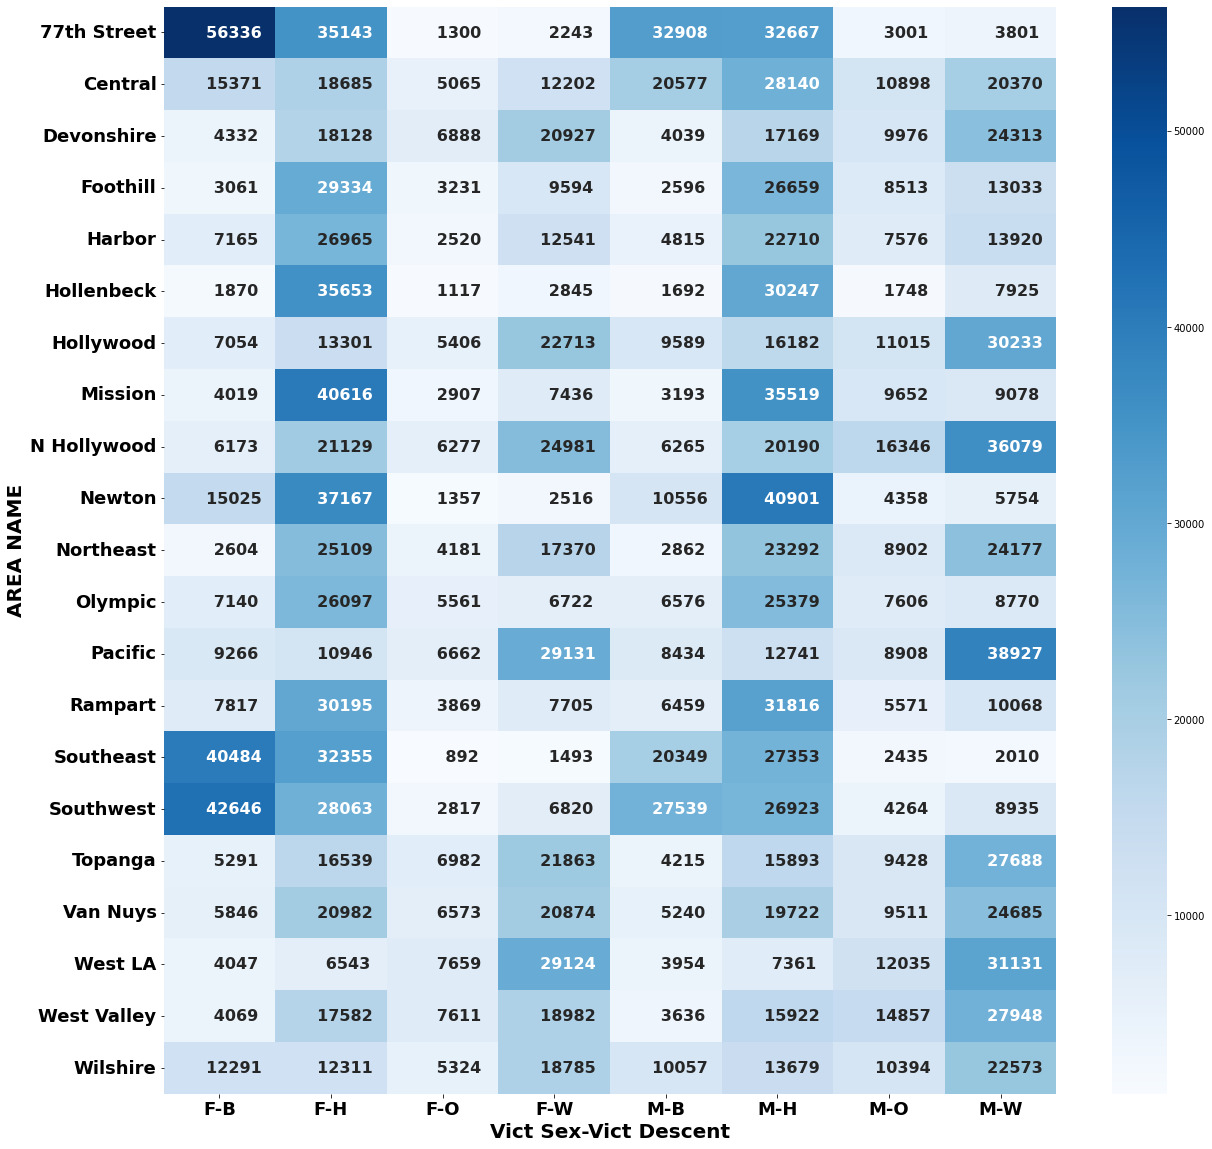

In [41]:
plt.figure(figsize=(20,20))
heatmap = sns.heatmap(piv1_1,annot = True,fmt='10',cmap = 'Blues', annot_kws={"weight": "bold","fontsize": 16})
# Make all labels and ticks bold
heatmap.set_xticklabels(heatmap.get_xticklabels(), weight='bold',fontsize=18)
heatmap.set_yticklabels(heatmap.get_yticklabels(), weight='bold', rotation=0, fontsize=18)  # Rotation for y-axis labels

# Make the axis labels bold
heatmap.set_xlabel(heatmap.get_xlabel(), weight='bold', fontsize=20)
heatmap.set_ylabel(heatmap.get_ylabel(), weight='bold',fontsize=20)



# Conclusions:

### Overview:
- The total number of male and female victims is similar (M 1,333,623, F 1,210,023, unknown 449,787).

### Crime Distribution by Area:
- In three areas (77th street, southeast, southwest), fmales are more frequently involved in crimes as victims.

### Victims by Gender and Ethnicity:
- The most victimized ethnic groups for both men and women are: 
  1. Hispanic/Latin/Mexican
  2. White
  3. Black

### Area-specific Concerns:
- Areas less safe for black females: 77th street, southeast, southwest.

### Comparative Analysis:
- White men are more victimized compared to white women.
- Similar victimization patterns exist for Hispanic men and women across areas.

**Note:** These conclusions are based on a comprehensive analysis of the data, considering both gender and ethnicity factors.


## Question 2

### What are the regions and hours with higher crime rates?

In [42]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd Desc,Vict Age,Vict Sex,...,Status Desc,LOCATION,LAT,LON,Year_OCC,Month_OCC,MonthDay_OCC,DayOfWeekOCC,time_quarters,Vict Descent Name
0,1307355,2010-02-20,2010-02-20,13,13,Newton,1385,VIOLATION OF COURT ORDER,48,M,...,Adult Arrest,300 E GAGE AV,34,-118,2010,February,20,5,Afternoon,Hispanic/Latin/Mexican
1,11401303,2010-09-13,2010-12-09,00,14,Pacific,1485,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",NaN,M,...,Invest Cont,SEPULVEDA BL,34,-118,2010,December,9,3,Night,White
2,70309629,2010-09-08,2010-09-08,15,13,Newton,1324,OTHER MISCELLANEOUS CRIME,NaN,M,...,Invest Cont,1300 E 21ST ST,34,-118,2010,September,8,2,Afternoon,Hispanic/Latin/Mexican
3,90631215,2010-05-01,2010-05-01,01,6,Hollywood,646,VIOLATION OF COURT ORDER,47,F,...,Invest Cont,CAHUENGA BL,34,-118,2010,May,1,5,Night,White
4,100100501,2010-03-01,2010-02-01,21,1,Central,176,"RAPE, ATTEMPTED",47,F,...,Invest Cont,8TH ST,34,-118,2010,February,1,0,Evening,Hispanic/Latin/Mexican


In [43]:
df['TIME OCC'].sort_values(ascending = True)

2050769    00
1912424    00
1912422    00
961623     00
483493     00
           ..
1364518    23
1364540    23
2543186    23
2543178    23
2993432    23
Name: TIME OCC, Length: 2993433, dtype: object

In [44]:
piv3 = df.pivot_table(index = 'TIME OCC',
              columns = 'AREA NAME',
              values = 'DR_NO',
              aggfunc = 'count')#.sort_values('DR_NO',ascending = False)

In [45]:
piv3.head()

AREA NAME,77th Street,Central,Devonshire,Foothill,Harbor,Hollenbeck,Hollywood,Mission,N Hollywood,Newton,...,Olympic,Pacific,Rampart,Southeast,Southwest,Topanga,Van Nuys,West LA,West Valley,Wilshire
TIME OCC,,,,,,,,,,,,,,,,,,,,,
00,8158,5915,4904,4608,6062,4595,8157,5547,6872,5646,...,6247,6351,5674,6308,7184,4831,5476,5697,5578,4857
01,5905,5540,3347,3105,3526,3128,7046,3720,4591,4321,...,4892,4397,4274,4459,4921,3135,3569,2781,3212,3302
02,5025,4729,2844,2454,3103,2597,6287,3016,3960,3601,...,4179,3560,3822,3707,3944,2668,2969,2425,2889,2799
03,4200,3378,2436,2094,2521,2022,3981,2531,3156,2870,...,3206,2920,2709,3029,3228,2174,2583,2102,2310,2360
04,3383,2633,1959,1686,1958,1688,2721,2007,2553,2335,...,2487,2489,2148,2398,2483,1776,2061,1659,1921,1841


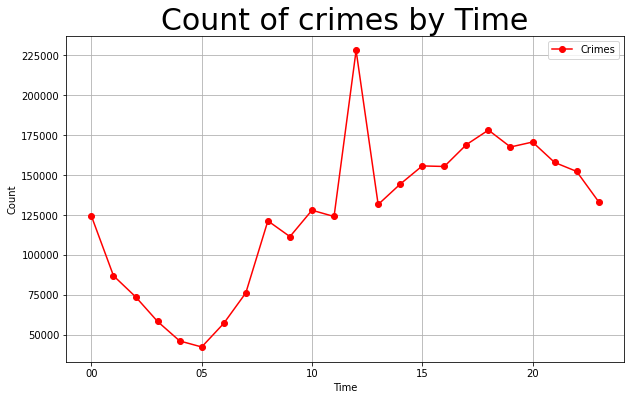

In [46]:
pivot_table = df.pivot_table(index='TIME OCC', values='DR_NO', aggfunc='count')

# Plotting the line chart
pivot_table.plot(kind='line', marker='o', linestyle='-', color='r', figsize=(10, 6)).set_title('Count of crimes by Time', fontsize=30)
plt.legend(['Crimes'])
plt.xlabel('Time')
plt.ylabel('Count')
plt.grid(True)
plt.show()

<ipython-input-47-0e279e1a755d>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), weight='bold', fontsize=14)


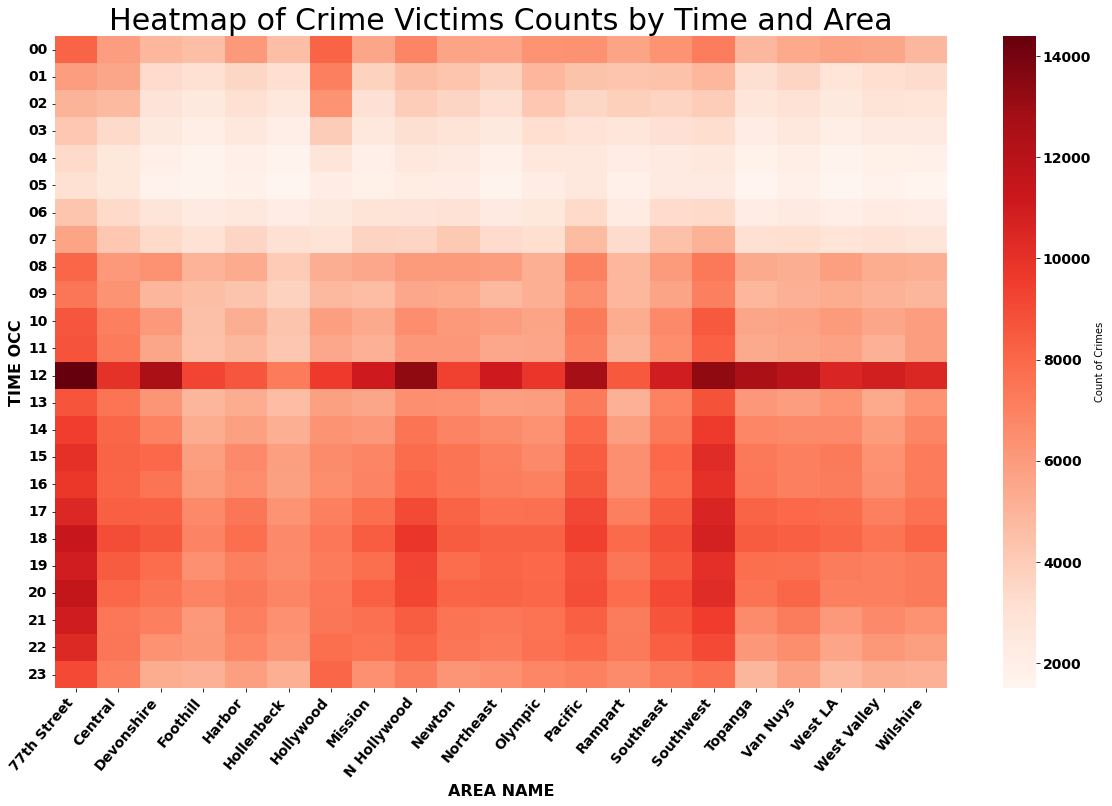

In [47]:
# Create a heatmap
plt.figure(figsize=(20, 12))
heatmap = sns.heatmap(piv3, annot=False, fmt='d', cmap='Reds', cbar_kws={'label': 'Count of Crimes'})

# Make all labels and ticks bold
heatmap.set_xticklabels(heatmap.get_xticklabels(), weight='bold', fontsize=14)
heatmap.set_yticklabels(heatmap.get_yticklabels(), weight='bold', rotation=0, fontsize=14)

# Make the axis labels bold and set font size
heatmap.set_xlabel(heatmap.get_xlabel(), weight='bold', fontsize=16)
heatmap.set_ylabel(heatmap.get_ylabel(), weight='bold', fontsize=16)

# Access the colorbar and set tick labels to bold
cbar = heatmap.collections[0].colorbar
cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), weight='bold', fontsize=14)

# Set plot labels and title
plt.title('Heatmap of Crime Victims Counts by Time and Area', fontsize=30)

# Rotate x-axis labels
plt.xticks(rotation=50, ha='right')

plt.show()

<ipython-input-48-022a1caa17df>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), weight='bold', fontsize=16)


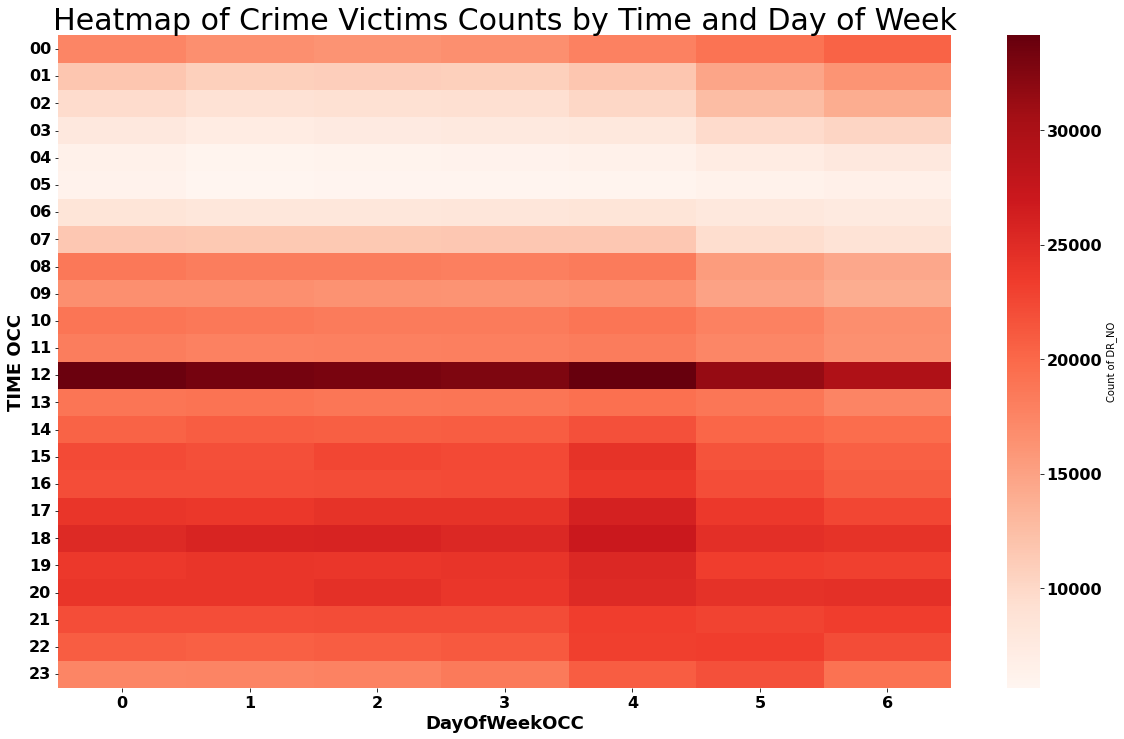

In [48]:
# Add 'dayofweek' as another level in the pivot table
piv4 = df.pivot_table(index='TIME OCC',
                      columns='DayOfWeekOCC',
                      values='DR_NO',
                      aggfunc='count')

# Create a heatmap with red and green colors
plt.figure(figsize=(20, 12))
heatmap = sns.heatmap(piv4, annot=False, fmt='d', cmap='Reds', cbar_kws={'label': 'Count of DR_NO'})

# Set font size for annotations
annot_kws = {"weight": "bold", "fontsize": 14}

# Make all labels and ticks bold
heatmap.set_xticklabels(heatmap.get_xticklabels(), weight='bold', fontsize=16)
heatmap.set_yticklabels(heatmap.get_yticklabels(), weight='bold', rotation=0, fontsize=16)

# Make the axis labels bold and set font size
heatmap.set_xlabel(heatmap.get_xlabel(), weight='bold', fontsize=18)
heatmap.set_ylabel(heatmap.get_ylabel(), weight='bold', fontsize=18)

# Access the colorbar and set tick labels to bold
cbar = heatmap.collections[0].colorbar
cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), weight='bold', fontsize=16)

# Set plot labels and title
plt.title('Heatmap of Crime Victims Counts by Time and Day of Week', fontsize=30)

plt.show()

# Conclusion

## Daily and Hourly Analysis:
- During the late night and early morning hours (midnight up to 5-6 AM), there is a noticeable decrease in the number of cases.
- Starting from around 6 AM, there is a consistent rise in cases, peaking around noon, followed by a gradual decrease.

## Regional Analysis:
- Peak cases occur around 12 noon in all areas.
- Specifically in 77th Street and Southwest, more cases are observed between 12 noon and midnight. Additional areas where there were cases with prominent victims include: N Hollywood, Southeast, and Pacific.

## Weekly and Daily Distribution:
- 12 noon consistently has the highest number of cases every day.
- Evenings on Fridays and Saturdays exhibit a higher number of cases.
- More cases are observed in the second half of the day compared to the first half. 

**Note:** These conclusions provide insights into the temporal and regional patterns of incidents, aiding in strategic decision-making for law enforcement and public safety.
```


# Question 3

### What is the distribution of crime categories over the years, and how does the reporting time vary for each category?

In [49]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd Desc,Vict Age,Vict Sex,...,Status Desc,LOCATION,LAT,LON,Year_OCC,Month_OCC,MonthDay_OCC,DayOfWeekOCC,time_quarters,Vict Descent Name
0,1307355,2010-02-20,2010-02-20,13,13,Newton,1385,VIOLATION OF COURT ORDER,48,M,...,Adult Arrest,300 E GAGE AV,34,-118,2010,February,20,5,Afternoon,Hispanic/Latin/Mexican
1,11401303,2010-09-13,2010-12-09,00,14,Pacific,1485,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",NaN,M,...,Invest Cont,SEPULVEDA BL,34,-118,2010,December,9,3,Night,White
2,70309629,2010-09-08,2010-09-08,15,13,Newton,1324,OTHER MISCELLANEOUS CRIME,NaN,M,...,Invest Cont,1300 E 21ST ST,34,-118,2010,September,8,2,Afternoon,Hispanic/Latin/Mexican
3,90631215,2010-05-01,2010-05-01,01,6,Hollywood,646,VIOLATION OF COURT ORDER,47,F,...,Invest Cont,CAHUENGA BL,34,-118,2010,May,1,5,Night,White
4,100100501,2010-03-01,2010-02-01,21,1,Central,176,"RAPE, ATTEMPTED",47,F,...,Invest Cont,8TH ST,34,-118,2010,February,1,0,Evening,Hispanic/Latin/Mexican


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2993433 entries, 0 to 2993432
Data columns (total 23 columns):
 #   Column             Dtype         
---  ------             -----         
 0   DR_NO              int64         
 1   Date Rptd          datetime64[ns]
 2   DATE OCC           datetime64[ns]
 3   TIME OCC           object        
 4   AREA               float64       
 5   AREA NAME          object        
 6   Rpt Dist No        int64         
 7   Crm Cd Desc        object        
 8   Vict Age           float64       
 9   Vict Sex           object        
 10  Vict Descent       object        
 11  Premis Desc        object        
 12  Weapon Desc        object        
 13  Status Desc        object        
 14  LOCATION           object        
 15  LAT                float64       
 16  LON                float64       
 17  Year_OCC           int32         
 18  Month_OCC          object        
 19  MonthDay_OCC       int32         
 20  DayOfWeekOCC       int32

In [51]:
df_3 = df[['Date Rptd', 'DATE OCC', 'Year_OCC','Crm Cd Desc', 'LAT', 'LON' ]]
df_3

,Date Rptd,DATE OCC,Year_OCC,Crm Cd Desc,LAT,LON
0,2010-02-20,2010-02-20,2010,VIOLATION OF COURT ORDER,34,-118
1,2010-09-13,2010-12-09,2010,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",34,-118
2,2010-09-08,2010-09-08,2010,OTHER MISCELLANEOUS CRIME,34,-118
3,2010-05-01,2010-05-01,2010,VIOLATION OF COURT ORDER,34,-118
4,2010-03-01,2010-02-01,2010,"RAPE, ATTEMPTED",34,-118
...,...,...,...,...,...,...
2993428,2023-03-22,2023-03-22,2023,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",34,-118
2993429,2023-12-04,2023-12-04,2023,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",34,-118
2993430,2023-02-07,2023-01-07,2023,PICKPOCKET,34,-118
2993431,2023-05-03,2023-05-03,2023,VANDALISM - MISDEAMEANOR ($399 OR UNDER),34,-118


In [52]:
df_3['datediff'] = df_3['Date Rptd'] - df['DATE OCC']

<ipython-input-52-4201c12e9595>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['datediff'] = df_3['Date Rptd'] - df['DATE OCC']


In [53]:
df_3['datediff'].value_counts()

datediff
0 days       1426965
1 days        414251
31 days       143995
2 days         99350
30 days        94335
              ...   
4246 days          1
2686 days          1
4135 days          1
3371 days          1
-328 days          1
Name: count, Length: 4098, dtype: int64

In [54]:
maskdiff = df_3['datediff'] < '0 days'

len(df_3[maskdiff])

211335

In [55]:
len(df_3['datediff'])

2993433

In [56]:
df_3.drop(df_3[df_3['datediff'] < pd.Timedelta('0 days')].index, inplace=True)
df_3

<ipython-input-56-1d61f8b0cb32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3.drop(df_3[df_3['datediff'] < pd.Timedelta('0 days')].index, inplace=True)


,Date Rptd,DATE OCC,Year_OCC,Crm Cd Desc,LAT,LON,datediff
0,2010-02-20,2010-02-20,2010,VIOLATION OF COURT ORDER,34,-118,0 days
2,2010-09-08,2010-09-08,2010,OTHER MISCELLANEOUS CRIME,34,-118,0 days
3,2010-05-01,2010-05-01,2010,VIOLATION OF COURT ORDER,34,-118,0 days
4,2010-03-01,2010-02-01,2010,"RAPE, ATTEMPTED",34,-118,28 days
5,2010-05-01,2010-04-01,2010,SHOPLIFTING - PETTY THEFT ($950 & UNDER),34,-118,30 days
...,...,...,...,...,...,...,...
2993428,2023-03-22,2023-03-22,2023,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",34,-118,0 days
2993429,2023-12-04,2023-12-04,2023,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",34,-118,0 days
2993430,2023-02-07,2023-01-07,2023,PICKPOCKET,34,-118,31 days
2993431,2023-05-03,2023-05-03,2023,VANDALISM - MISDEAMEANOR ($399 OR UNDER),34,-118,0 days


In [57]:
df_3['datediff'].value_counts()

datediff
0 days       1426965
1 days        414251
31 days       143995
2 days         99350
30 days        94335
              ...   
3447 days          1
3587 days          1
3625 days          1
3401 days          1
2166 days          1
Name: count, Length: 3768, dtype: int64

In [58]:
df_3['datediff'].sort_values().value_counts()

datediff
0 days       1426965
1 days        414251
31 days       143995
2 days         99350
30 days        94335
              ...   
2608 days          1
3429 days          1
2599 days          1
3435 days          1
5091 days          1
Name: count, Length: 3768, dtype: int64

In [59]:
df_3['datediff_numeric'] = df_3['datediff'].dt.days

df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2782098 entries, 0 to 2993432
Data columns (total 8 columns):
 #   Column            Dtype          
---  ------            -----          
 0   Date Rptd         datetime64[ns] 
 1   DATE OCC          datetime64[ns] 
 2   Year_OCC          int32          
 3   Crm Cd Desc       object         
 4   LAT               float64        
 5   LON               float64        
 6   datediff          timedelta64[ns]
 7   datediff_numeric  int64          
dtypes: datetime64[ns](2), float64(2), int32(1), int64(1), object(1), timedelta64[ns](1)
memory usage: 180.4+ MB


<ipython-input-59-382bf25cdb6a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['datediff_numeric'] = df_3['datediff'].dt.days


In [60]:
df_3_sorted = df_3.sort_values(by='datediff', ascending=False)
maskreport =  df_3['datediff_numeric'] > 180
df_4 = df_3_sorted[maskreport]

#df_4 - דאטה מסונן למה שמעל 180 ימי דיווח

<ipython-input-60-2e69946f3ec8>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_4 = df_3_sorted[maskreport]


In [61]:
#סידור סוגי הפשע לקטגוריות

# פונקציה לסידור קטגוריה של פשע
def categorize_crime(crime_type):
    if crime_type in property_crimes:
        return "Property Crimes"
    elif crime_type in sexual_offenses:
        return "Sexual Offenses"
    elif crime_type in violent_crimes:
        return "Violent Crimes"
    elif crime_type in white_collar_crimes:
        return "White Collar Crimes"
    else:
        return "Other Crimes"

# קטגוריה של Property Crimes
property_crimes = [
    "VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",
    "EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",
    "THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)",
    "VEHICLE - STOLEN",
    "THEFT PLAIN - PETTY ($950 & UNDER)",
    "THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)",
    "THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD",
    "DOCUMENT FORGERY / STOLEN FELONY",
    "BURGLARY FROM VEHICLE",
    "BURGLARY",
    "SHOPLIFTING - PETTY THEFT ($950 & UNDER)",
    "VANDALISM - MISDEAMEANOR ($399 OR UNDER)",
    "BIKE - STOLEN",
    "TRESPASSING",
    "BURGLARY, ATTEMPTED",
    "ATTEMPTED ROBBERY",
    "VEHICLE - ATTEMPT STOLEN",
    "EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)",
    "THEFT FROM MOTOR VEHICLE - ATTEMPT",
    "BOAT - STOLEN",
    "DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $950.01",
    "PICKPOCKET",
    "DISHONEST EMPLOYEE - GRAND THEFT",
    "SHOPLIFTING-GRAND THEFT ($950.01 & OVER)",
    "VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)",
    "TILL TAP - GRAND THEFT ($950.01 & OVER)",
    "BURGLARY FROM VEHICLE, ATTEMPTED",
    "PURSE SNATCHING",
    "DISHONEST EMPLOYEE - PETTY THEFT",
    "THEFT PLAIN - ATTEMPT",
    "GRAND THEFT / AUTO REPAIR",
    "THEFT, COIN MACHINE - PETTY ($950 & UNDER)",
    "DRIVING WITHOUT OWNER CONSENT (DWOC)",
    "THEFT, COIN MACHINE - GRAND ($950.01 & OVER)"
]

# קטגוריה של Sexual Offenses
sexual_offenses = [
    "RAPE, FORCIBLE",
    "SEXUAL PENETRATION W/FOREIGN OBJECT",
    "LEWD/LASCIVIOUS ACTS WITH CHILD",
    "CHILD ANNOYING (17YRS & UNDER)",
    "ORAL COPULATION",
    "BIGAMY",
    "SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH",
    "HUMAN TRAFFICKING - COMMERCIAL SEX ACTS",
    "SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ",
    "RAPE, ATTEMPTED",
    "INDECENT EXPOSURE",
    "FALSE IMPRISONMENT",
    "PIMPING",
    "LEWD CONDUCT",
    "KIDNAPPING",
    "CHILD PORNOGRAPHY",
    "SEX OFFENDER REGISTRANT OUT OF COMPLIANCE",
    "EXTORTION",
    "PANDERING",
    "PEEPING TOM",
    "PROWLER",
    "BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM"
]

# קטגוריה של Violent Crimes
violent_crimes = [
    "CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)",
    "CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT",
    "BATTERY WITH SEXUAL CONTACT",
    "INTIMATE PARTNER - AGGRAVATED ASSAULT",
    "INTIMATE PARTNER - SIMPLE ASSAULT",
    "BATTERY - SIMPLE ASSAULT",
    "CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT",
    "ROBBERY",
    "OTHER ASSAULT",
    "CRIMINAL THREATS - NO WEAPON DISPLAYED",
    "HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE",
    "ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",
    "BRANDISH WEAPON",
    "BATTERY POLICE (SIMPLE)",
    "THROWING OBJECT AT MOVING VEHICLE",
    "ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER",
    "CRUELTY TO ANIMALS",
    "CRIMINAL HOMICIDE",
    "BOMB SCARE",
    "KIDNAPPING - GRAND ATTEMPT",
    "CHILD STEALING",
    "DISCHARGE FIREARMS/SHOTS FIRED",
    "WEAPONS POSSESSION/BOMBING",
    "SHOTS FIRED AT INHABITED DWELLING",
    "ARSON"
]

# קטגוריה של White Collar Crimes
white_collar_crimes = [
    "THEFT OF IDENTITY",
    "THEFT, PERSON",
    "BUNCO, GRAND THEFT",
    "UNAUTHORIZED COMPUTER ACCESS",
    "BUNCO, PETTY THEFT",
    "CREDIT CARDS, FRAUD USE ($950 & UNDER)",
    "CREDIT CARDS, FRAUD USE ($950.01 & OVER)",
    "BRIBERY",
    "BUNCO, ATTEMPT",
    "GRAND THEFT / INSURANCE FRAUD",
    "DEFRAUDING INNKEEPER/THEFT OF SERVICES, $950 & UNDER",
    "COUNTERFEIT",
    "CONSPIRACY"
]

# הוספת עמודת קטגוריה
df_4["Category"] = df_4["Crm Cd Desc"].apply(categorize_crime)

# הדפסת הקטגוריה לדוגמה
print(df_4[["Crm Cd Desc", "Category"]].head())


                                                     Crm Cd Desc  \
209302                                            RAPE, FORCIBLE   
209305                                         THEFT OF IDENTITY   
209303  CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)   
209298                                            RAPE, FORCIBLE   
209300                   CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT   

                   Category  
209302      Sexual Offenses  
209305  White Collar Crimes  
209303       Violent Crimes  
209298      Sexual Offenses  
209300       Violent Crimes  


<ipython-input-61-2ae3fef01a3e>:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4["Category"] = df_4["Crm Cd Desc"].apply(categorize_crime)


<ipython-input-62-0854d877a4d6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Category', data=df_4, order=df_4['Category'].value_counts().index, palette='inferno')


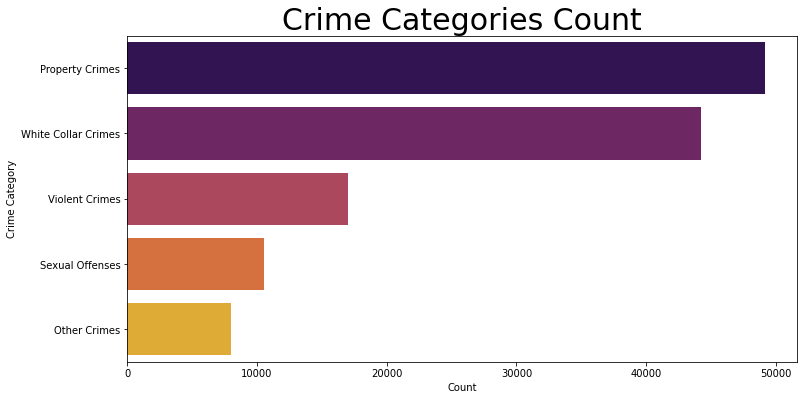

In [62]:
# Create a bar plot for crime categories
plt.figure(figsize=(12, 6))
sns.countplot(y='Category', data=df_4, order=df_4['Category'].value_counts().index, palette='inferno')
plt.title('Crime Categories Count',fontsize=30)
plt.xlabel('Count')
plt.ylabel('Crime Category')
plt.show()

#כמות מקרים פר סוג פשע לאורך כל התקופה במצטבר

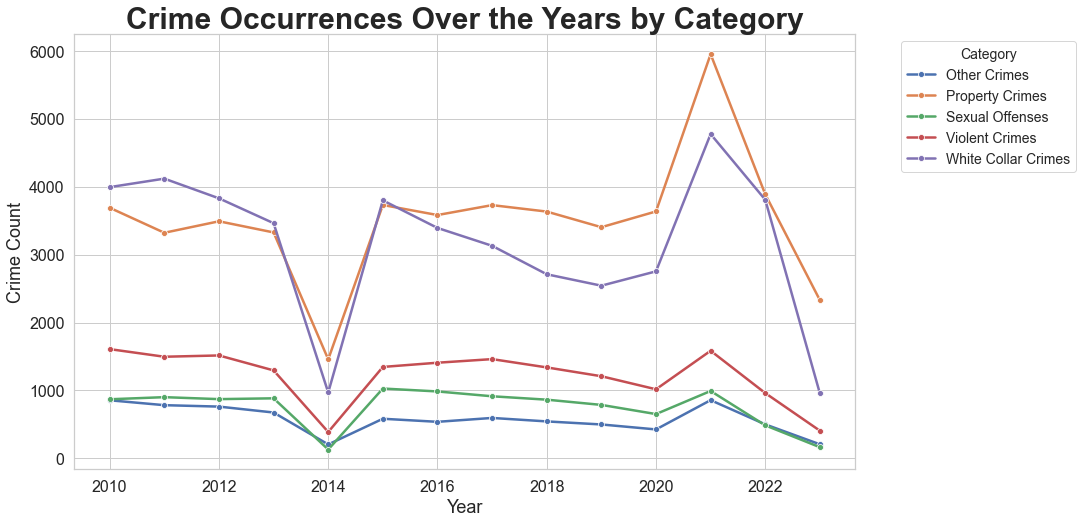

In [63]:
# Assuming 'DATE OCC' is the column with the occurrence date
# We will group by 'Year_OCC' and 'Category', and count the occurrences for each combination
df_grouped = df_4.groupby(['Year_OCC', 'Category'])['DATE OCC'].count().reset_index()
df_grouped.columns = ['Year_OCC', 'Category', 'COUNT']

# Set the style
sns.set(style="whitegrid")

# Create a line plot for each crime category over the years with thicker lines
plt.figure(figsize=(14, 8))
sns.lineplot(x='Year_OCC', y='COUNT', hue='Category', data=df_grouped, marker='o', linewidth=2.5)

# Make everything bigger and bolder
plt.title('Crime Occurrences Over the Years by Category', fontsize=30, weight='bold')
plt.xlabel('Year', fontsize=18)
plt.ylabel('Crime Count', fontsize=18)
plt.xticks(fontsize=16 )
plt.yticks(fontsize=16)

# Set legend properties
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14, title_fontsize=14)

plt.show()
#התפלגות סוגי פשיעה לאורך השנים

In [64]:
df_4['Category'].value_counts()

Category
Property Crimes        49161
White Collar Crimes    44232
Violent Crimes         17034
Sexual Offenses        10529
Other Crimes            8029
Name: count, dtype: int64

<ipython-input-65-5065f0065937>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x="Category", y="datediff_numeric", data=avg_report_time, palette=red_palette)


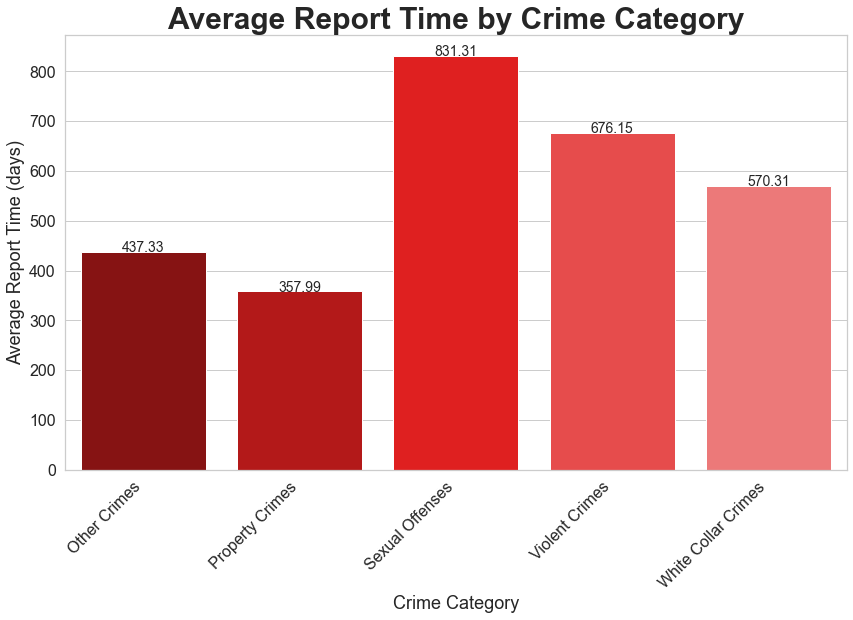

In [65]:
# חישוב ממוצע זמן הדיווח לפי סוגי הפשעים
avg_report_time = df_4.groupby("Category")["datediff_numeric"].mean().reset_index()

# Set the style
sns.set(style="whitegrid")

# Define custom colors
red_palette = sns.color_palette(['#990000', '#CC0000', '#FF0000', '#FF3333', '#FF6666'])

# Create a bar plot for average report time by crime category
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x="Category", y="datediff_numeric", data=avg_report_time, palette=red_palette)

# Customize the plot
plt.xlabel('Crime Category', fontsize=18)
plt.ylabel('Average Report Time (days)', fontsize=18)
plt.title('Average Report Time by Crime Category', fontsize=30, weight='bold')
plt.xticks(rotation=45, ha="right", fontsize=16)
plt.yticks(fontsize=16)

# Add data labels
for p in bar_plot.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 0.2,
             '{:1.2f}'.format(height),
             ha="center", fontsize=14)

plt.show()


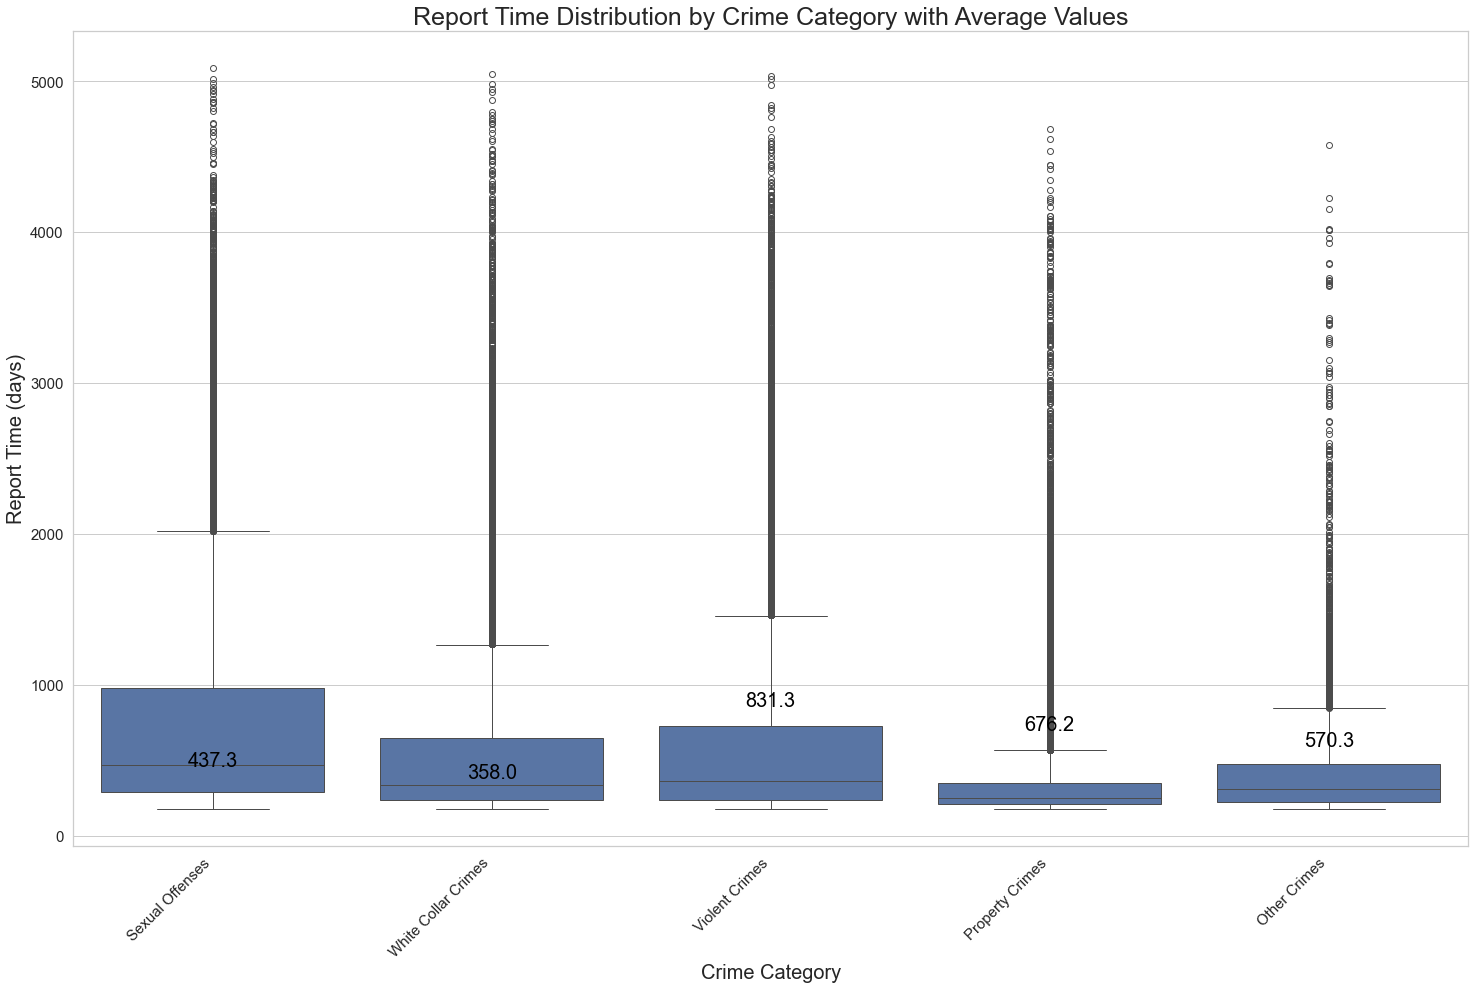

In [66]:
# Set the style
sns.set(style="whitegrid")

# Create a boxplot for report time by crime category
plt.figure(figsize=(25, 15))
box_plot = sns.boxplot(x="Category", y="datediff_numeric", data=df_4)

# Add average values
avg_values = df_4.groupby("Category")["datediff_numeric"].mean().reset_index()
for i, value in enumerate(avg_values["datediff_numeric"]):
    plt.text(i, value, f'{value:.1f}', color='black', ha="center", va="bottom", fontsize=20)

# Customize the plot
plt.xlabel('Crime Category', fontsize=20)
plt.ylabel('Report Time (days)', fontsize=20)
plt.title('Report Time Distribution by Crime Category with Average Values', fontsize=25)
plt.xticks(rotation=45, ha="right", fontsize=15)
plt.yticks(fontsize=15)

plt.show()

##להראות למאיה

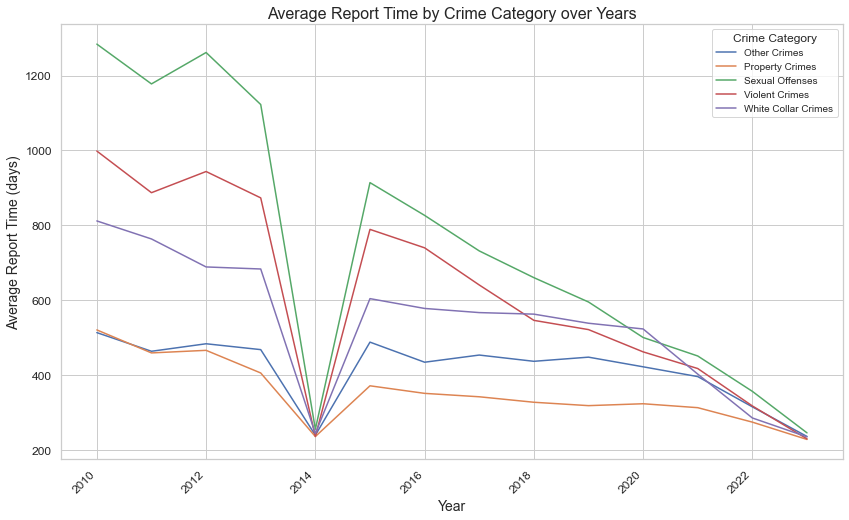

In [67]:
# Assuming df_4 has columns 'YEAR_OCC', 'Category', and 'datediff_numeric'

# Group by 'YEAR_OCC' and 'Category' and calculate the mean
avg_report_time = df_4.groupby(['Year_OCC', 'Category'])['datediff_numeric'].mean().reset_index()

# Set the style
sns.set(style="whitegrid")

# Define custom colors
red_palette = sns.color_palette(['#990000', '#CC0000', '#FF0000', '#FF3333', '#FF6666'])

# Create a line plot for average report time by crime category
plt.figure(figsize=(14, 8))
line_plot = sns.lineplot(x="Year_OCC", y="datediff_numeric", hue="Category", data=avg_report_time)

# Customize the plot
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Report Time (days)', fontsize=14)
plt.title('Average Report Time by Crime Category over Years', fontsize=16)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)

# Add a legend
plt.legend(title='Crime Category', title_fontsize='12', fontsize='10')



plt.show()


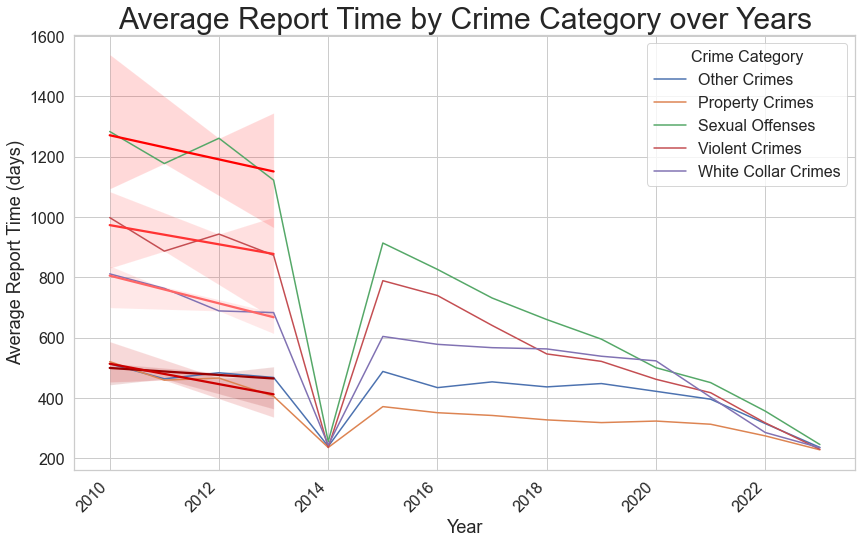

In [68]:
# Filter data for the years 2010 to 2013
subset_data = avg_report_time[(avg_report_time['Year_OCC'] >= 2010) & (avg_report_time['Year_OCC'] <= 2013)]

# Set the style
sns.set(style="whitegrid")

# Create a line plot for average report time by crime category
plt.figure(figsize=(14, 8))
line_plot = sns.lineplot(x="Year_OCC", y="datediff_numeric", hue="Category", data=avg_report_time)

# Add regression lines for the years 2010 to 2013
for category, color in zip(subset_data['Category'].unique(), red_palette):
    subset_category = subset_data[subset_data['Category'] == category]
    sns.regplot(x='Year_OCC', y='datediff_numeric', data=subset_category, scatter=False, color=color)

# Customize the plot
plt.xlabel('Year', fontsize=18)
plt.ylabel('Average Report Time (days)', fontsize=18)
plt.title('Average Report Time by Crime Category over Years', fontsize=30)
plt.xticks(rotation=45, ha="right", fontsize=16)
plt.yticks(fontsize=16)

# Add a legend
plt.legend(title='Crime Category', title_fontsize='16', fontsize='16')

plt.show()


In [8]:
import openpyxl
from openpyxl.chart import LineChart, Reference

# Sample data
data = [
    [2010, 'Other Crimes', 513.5578947],
    # ... (your complete data)

]

# Create a new workbook
workbook = openpyxl.Workbook()
sheet = workbook.active
sheet.title = "Crime Data"

# Add headers
headers = ['Year_OCC', 'Category', 'datediff_numeric']
sheet.append(headers)

# Add data to the sheet
for row in data:
    # Convert the third column to the built-in float type
    row[2] = float(row[2])
    sheet.append(row)
# Add data to the sheet
for row in data:
    sheet.append(row)

# Create a line chart
chart = LineChart()
chart.title = "Average Report Time for Crime Categories"
chart.x_axis.title = "Year"
chart.y_axis.title = "Average Report Time"

# Select data for the chart
data_reference = Reference(sheet, min_col=3, min_row=2, max_col=3, max_row=sheet.max_row)
categories_reference = Reference(sheet, min_col=1, min_row=2, max_col=1, max_row=sheet.max_row)
chart.add_data(data_reference, titles_from_data=True)
chart.set_categories(categories_reference)

# Add the chart to the worksheet
sheet.add_chart(chart, "E5")

# Save the workbook
workbook.save("Average_Report_Time.xlsx")


AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [69]:
#הקואורדינטות של לוס אנג'לס, קליפורניה, ארצות הברית הן:

#קו רוחב (Latitude): 34.0522° N
#קו אורך (Longitude): 118.2437° W

In [70]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128985 entries, 209302 to 617765
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype          
---  ------            --------------   -----          
 0   Date Rptd         128985 non-null  datetime64[ns] 
 1   DATE OCC          128985 non-null  datetime64[ns] 
 2   Year_OCC          128985 non-null  int32          
 3   Crm Cd Desc       128985 non-null  object         
 4   LAT               128985 non-null  float64        
 5   LON               128985 non-null  float64        
 6   datediff          128985 non-null  timedelta64[ns]
 7   datediff_numeric  128985 non-null  int64          
 8   Category          128985 non-null  object         
dtypes: datetime64[ns](2), float64(2), int32(1), int64(1), object(2), timedelta64[ns](1)
memory usage: 9.3+ MB


In [71]:
'''
# Create a map centered around Los Angeles, California + adding some info in the markers popups
map = folium.Map(location=[34.0522, -118.2437], zoom_start=11)

# Iterate over the first 100 crimes and add markers to the map
for index, row in df_4.head(100).iterrows():
    # format the text in the marker's popup (using html code)
    crime_info = f"Crime type<b>:</b> {row['Crm Cd Desc']}<br>Date Occurred<b>:</b> {row['DATE OCC'].strftime('%Y-%m-%d')}<br>Date Reported<b>:</b> {row['Date Rptd'].strftime('%Y-%m-%d')}<br>Days to report<b>:</b> {row['datediff_numeric']} days"
    folium.Marker([row['LAT'], row['LON']]
                 ,popup=folium.Popup(crime_info, min_width=100, max_width=300)).add_to(map)
    
# Display the map
map
'''


'\n# Create a map centered around Los Angeles, California + adding some info in the markers popups\nmap = folium.Map(location=[34.0522, -118.2437], zoom_start=11)\n\n# Iterate over the first 100 crimes and add markers to the map\nfor index, row in df_4.head(100).iterrows():\n    # format the text in the marker\'s popup (using html code)\n    crime_info = f"Crime type<b>:</b> {row[\'Crm Cd Desc\']}<br>Date Occurred<b>:</b> {row[\'DATE OCC\'].strftime(\'%Y-%m-%d\')}<br>Date Reported<b>:</b> {row[\'Date Rptd\'].strftime(\'%Y-%m-%d\')}<br>Days to report<b>:</b> {row[\'datediff_numeric\']} days"\n    folium.Marker([row[\'LAT\'], row[\'LON\']]\n                 ,popup=folium.Popup(crime_info, min_width=100, max_width=300)).add_to(map)\n    \n# Display the map\nmap\n'

In [72]:
df_4['Yearsdatediff_numeric'] = round(df_4['datediff'].dt.days / 365, 0)
df_4['Year_Rptd'] = df_4['Date Rptd'].dt.year
df_4

<ipython-input-72-8d9d6fc9a31a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4['Yearsdatediff_numeric'] = round(df_4['datediff'].dt.days / 365, 0)
<ipython-input-72-8d9d6fc9a31a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4['Year_Rptd'] = df_4['Date Rptd'].dt.year


,Date Rptd,DATE OCC,Year_OCC,Crm Cd Desc,LAT,LON,datediff,datediff_numeric,Category,Yearsdatediff_numeric,Year_Rptd
209302,2023-12-10,2010-01-01,2010,"RAPE, FORCIBLE",34,-118,5091 days,5091,Sexual Offenses,14,2023
209305,2023-10-28,2010-01-01,2010,THEFT OF IDENTITY,34,-119,5048 days,5048,White Collar Crimes,14,2023
209303,2023-10-24,2010-01-07,2010,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER),34,-118,5038 days,5038,Violent Crimes,14,2023
209298,2023-09-27,2010-01-01,2010,"RAPE, FORCIBLE",34,-118,5017 days,5017,Sexual Offenses,14,2023
209300,2023-09-27,2010-01-01,2010,CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT,34,-118,5017 days,5017,Violent Crimes,14,2023
...,...,...,...,...,...,...,...,...,...,...,...
2704314,2022-08-01,2022-02-01,2022,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD",34,-118,181 days,181,Property Crimes,0,2022
406538,2011-07-11,2011-01-11,2011,VANDALISM - MISDEAMEANOR ($399 OR UNDER),34,-118,181 days,181,Property Crimes,0,2011
2928901,2023-07-05,2023-01-05,2023,PICKPOCKET,34,-118,181 days,181,Property Crimes,0,2023
2944838,2023-07-06,2023-01-06,2023,THEFT OF IDENTITY,34,-118,181 days,181,White Collar Crimes,0,2023


In [73]:
# יצירת קטגוריות לפי טווחי השנים
bins = [-np.inf, 1, 3, 5, 10, np.inf]
labels = ['Current Year', '1-3 years', '3-5 years', '5-10 years', '10+ years']

# הוספת עמודה חדשה המקטלגת את ההפרש בשנים
df_4['Year_Category'] = pd.cut(df_4['Yearsdatediff_numeric'], bins=bins, labels=labels)


# יצירת טבלה פיבוט שתציג כמה דיווחים יש לכל שנה וקטגוריה
pivot_table_rpt = df_4.pivot_table(index='Year_Rptd', columns='Year_Category', aggfunc='size', fill_value=0)

pivot_table_rpt.transpose()


<ipython-input-73-f25eb2db47e2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4['Year_Category'] = pd.cut(df_4['Yearsdatediff_numeric'], bins=bins, labels=labels)


Year_Rptd,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Year_Category,,,,,,,,,,,,,,
Current Year,4157,6997,7263,6904,6010,4419,7447,7227,7210,7154,5901,8485,12166,7573
1-3 years,0,578,1529,1835,1822,1130,885,1364,1728,1590,1236,1568,2087,2477
3-5 years,0,0,0,166,563,632,613,479,293,420,486,610,655,582
5-10 years,0,0,0,0,0,91,320,420,547,630,492,618,614,552
10+ years,0,0,0,0,0,0,0,0,0,0,40,110,149,161


In [74]:
# יצירת Series המציינת את סך הדיווחים לכל שנה
total_reports_per_year = df_4.groupby('Year_Rptd').size()

# יצירת טבלת פיבוט עם סכומים כוללים
pivot_table_rpt = df_4.pivot_table(index='Year_Rptd', columns='Year_Category', aggfunc='size', fill_value=0)
pivot_table_rpt['Total'] = total_reports_per_year

pivot_table_rpt.transpose()

Year_Rptd,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Year_Category,,,,,,,,,,,,,,
Current Year,4157,6997,7263,6904,6010,4419,7447,7227,7210,7154,5901,8485,12166,7573
1-3 years,0,578,1529,1835,1822,1130,885,1364,1728,1590,1236,1568,2087,2477
3-5 years,0,0,0,166,563,632,613,479,293,420,486,610,655,582
5-10 years,0,0,0,0,0,91,320,420,547,630,492,618,614,552
10+ years,0,0,0,0,0,0,0,0,0,0,40,110,149,161
Total,4157,7575,8792,8905,8395,6272,9265,9490,9778,9794,8155,11391,15671,11345


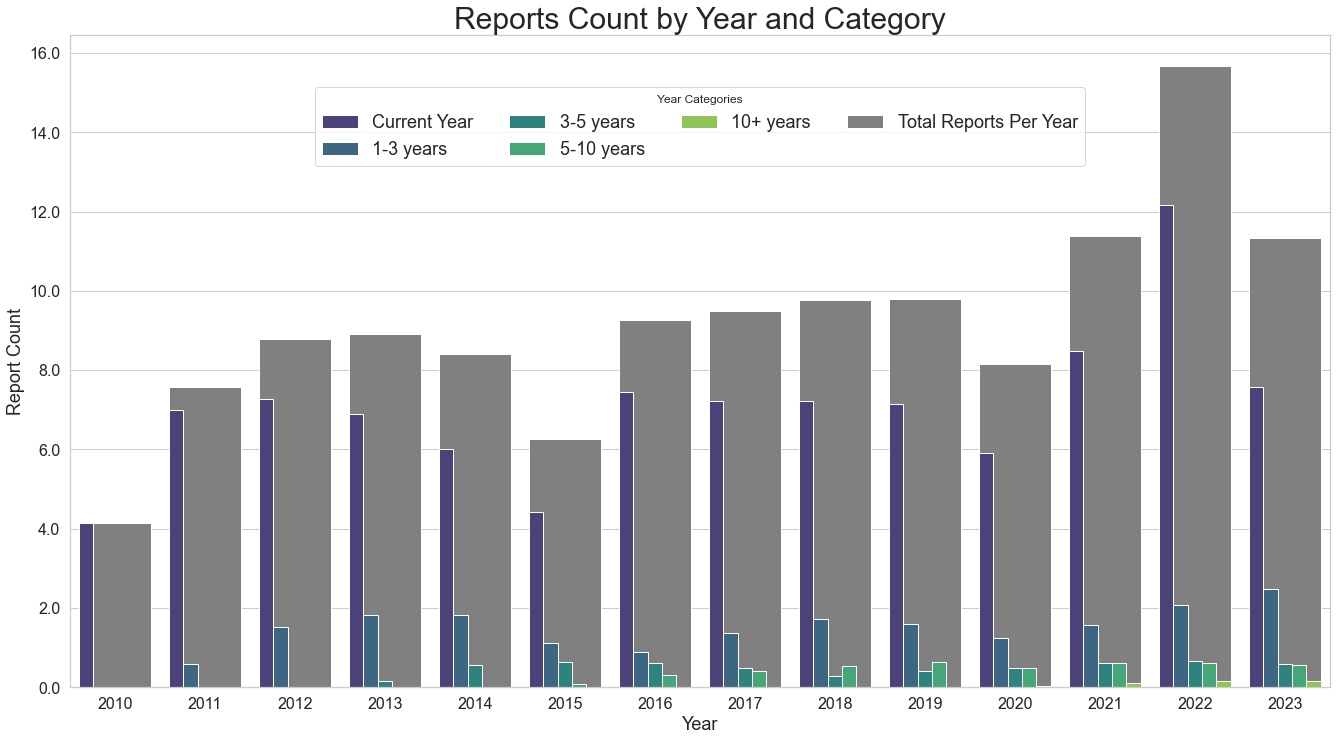

In [75]:

from matplotlib.ticker import FuncFormatter

# Assuming pivot_table_rpt is your DataFrame
# Modify the code based on your actual DataFrame if needed

# Set the style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(20, 12))

bar_plot = sns.barplot(data=pivot_table_rpt, x=pivot_table_rpt.index, y='Total', color='gray', label='Total Reports Per Year')
sns.barplot(data=pivot_table_rpt.drop('Total', axis=1).stack().reset_index(name='Category Count'),
            x='Year_Rptd', y='Category Count', hue='Year_Category', palette='viridis')

# Add value labels without 'K' and with one digit after the period
#for p in bar_plot.patches:
 #   height = p.get_height()
 #   plt.text(p.get_x() + p.get_width() / 2., height + 0.2,
   #          f'{height/1000:.1f}',  # Format without 'K' and one digit after the period
    #         ha="center", fontsize=12)

# Format y-axis labels without 'K' and with one digit after the period using FuncFormatter
def format_thousands(x, _):
    return f'{x/1000:.1f}'

bar_plot.yaxis.set_major_formatter(FuncFormatter(format_thousands))

# Set plot properties
plt.title('Reports Count by Year and Category', fontsize=30)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Report Count', fontsize=18)
plt.legend(title='Year Categories', bbox_to_anchor=(0.5, 1.02), loc='lower center', fontsize=18, ncol=4, borderaxespad=-8.)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplots_adjust(right=1)

plt.show()


In [76]:
# יצירת טבלת פיבוט עם סכומים כוללים לכל שנה
pivot_table_rpt_percentage = pivot_table_rpt.div(pivot_table_rpt['Total'], axis=0) * 100

# הצגת הטבלה
pivot_table_rpt_percentage

Year_Category,Current Year,1-3 years,3-5 years,5-10 years,10+ years,Total
Year_Rptd,,,,,,
2010,100,0,0,0,0,100
2011,92,8,0,0,0,100
2012,83,17,0,0,0,100
2013,78,21,2,0,0,100
2014,72,22,7,0,0,100
2015,70,18,10,1,0,100
2016,80,10,7,3,0,100
2017,76,14,5,4,0,100
2018,74,18,3,6,0,100


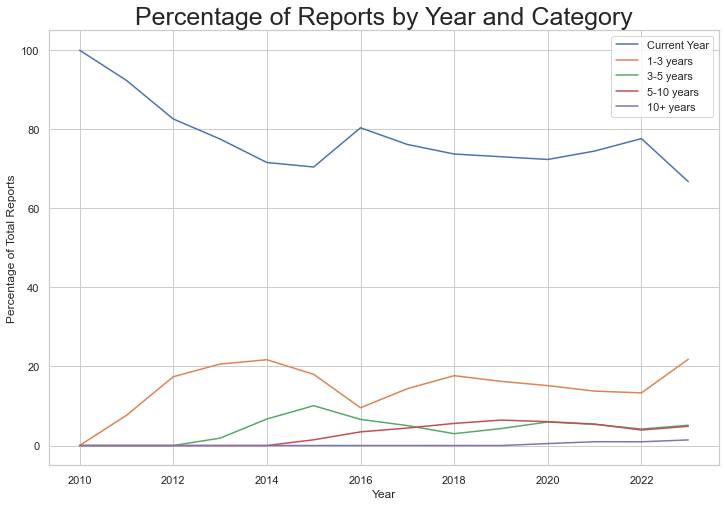

In [77]:
# יצירת גרף
plt.figure(figsize=(12, 8))

# עבור כל קטגוריה, הצג את הקו שלה בגרף
for category in pivot_table_rpt_percentage.columns[:-1]:  # כל העמודות חוץ מהעמודה האחרונה
    plt.plot(pivot_table_rpt_percentage.index, pivot_table_rpt_percentage[category], label=category)

plt.xlabel('Year')
plt.ylabel('Percentage of Total Reports')
plt.title('Percentage of Reports by Year and Category', fontsize = 25)
plt.legend()
plt.show()

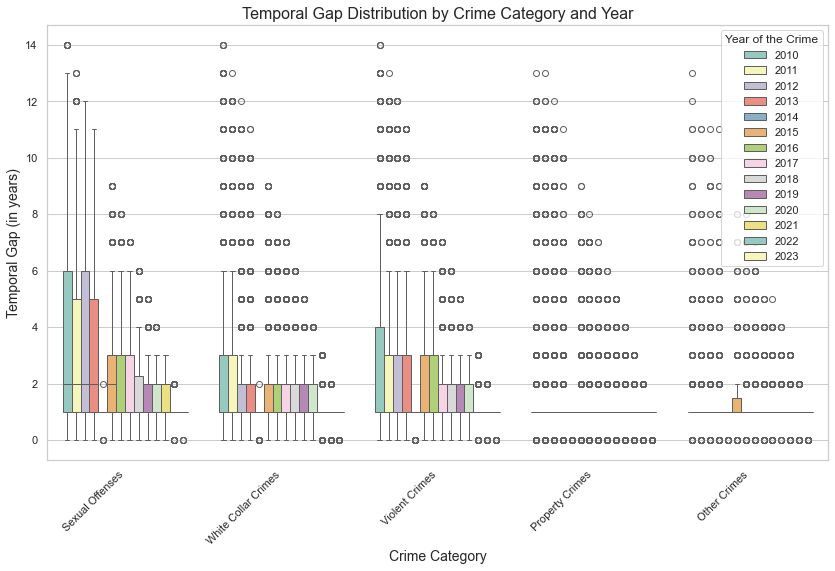

In [78]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Category', y='Yearsdatediff_numeric', hue='Year_OCC', data=df_4, palette='Set3')
plt.title('Temporal Gap Distribution by Crime Category and Year', fontsize=16)
plt.xlabel('Crime Category', fontsize=14)
plt.ylabel('Temporal Gap (in years)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year of the Crime', title_fontsize='12', loc='upper right')
plt.show()


In [79]:
result = df_4.groupby(['Year_Rptd', 'Year_Category']).size().reset_index(name='Number of Crimes')
result

,Year_Rptd,Year_Category,Number of Crimes
0,2010,Current Year,4157
1,2010,1-3 years,0
2,2010,3-5 years,0
3,2010,5-10 years,0
4,2010,10+ years,0
...,...,...,...
65,2023,Current Year,7573
66,2023,1-3 years,2477
67,2023,3-5 years,582
68,2023,5-10 years,552


In [80]:
#checking the results

maskyear = df_4['Year_Category'] == '10+ years'

df_4[maskyear]

,Date Rptd,DATE OCC,Year_OCC,Crm Cd Desc,LAT,LON,datediff,datediff_numeric,Category,Yearsdatediff_numeric,Year_Rptd,Year_Category
209302,2023-12-10,2010-01-01,2010,"RAPE, FORCIBLE",34,-118,5091 days,5091,Sexual Offenses,14,2023,10+ years
209305,2023-10-28,2010-01-01,2010,THEFT OF IDENTITY,34,-119,5048 days,5048,White Collar Crimes,14,2023,10+ years
209303,2023-10-24,2010-01-07,2010,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER),34,-118,5038 days,5038,Violent Crimes,14,2023,10+ years
209298,2023-09-27,2010-01-01,2010,"RAPE, FORCIBLE",34,-118,5017 days,5017,Sexual Offenses,14,2023,10+ years
209300,2023-09-27,2010-01-01,2010,CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT,34,-118,5017 days,5017,Violent Crimes,14,2023,10+ years
...,...,...,...,...,...,...,...,...,...,...,...,...
239169,2022-01-22,2011-07-25,2011,THEFT OF IDENTITY,34,-118,3834 days,3834,White Collar Crimes,11,2022,10+ years
515466,2023-03-28,2012-09-27,2012,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER),34,-118,3834 days,3834,Violent Crimes,11,2023,10+ years
504795,2022-07-22,2012-01-22,2012,THEFT OF IDENTITY,34,-118,3834 days,3834,White Collar Crimes,11,2022,10+ years
174983,2020-08-02,2010-02-02,2010,VANDALISM - MISDEAMEANOR ($399 OR UNDER),34,-118,3834 days,3834,Property Crimes,11,2020,10+ years


In [81]:
maskyear2 = df_4['datediff_numeric'] > 2000

df_4[maskyear2].sort_values('Year_Category', ascending = False).head(100)

,Date Rptd,DATE OCC,Year_OCC,Crm Cd Desc,LAT,LON,datediff,datediff_numeric,Category,Yearsdatediff_numeric,Year_Rptd,Year_Category
209302,2023-12-10,2010-01-01,2010,"RAPE, FORCIBLE",34,-118,5091 days,5091,Sexual Offenses,14,2023,10+ years
274457,2021-12-02,2011-01-01,2011,ORAL COPULATION,34,-118,3988 days,3988,Sexual Offenses,11,2021,10+ years
473901,2023-07-08,2012-07-31,2012,CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT,34,-118,3994 days,3994,Violent Crimes,11,2023,10+ years
125970,2020-12-15,2010-01-01,2010,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER),34,-119,4001 days,4001,Violent Crimes,11,2020,10+ years
461115,2023-11-13,2012-11-25,2012,"RAPE, FORCIBLE",34,-118,4005 days,4005,Sexual Offenses,11,2023,10+ years
...,...,...,...,...,...,...,...,...,...,...,...,...
234834,2022-06-21,2011-06-21,2011,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",34,-118,4018 days,4018,Property Crimes,11,2022,10+ years
495155,2023-07-14,2012-07-13,2012,VEHICLE - STOLEN,34,-118,4018 days,4018,Property Crimes,11,2023,10+ years
209247,2021-11-12,2010-11-12,2010,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),34,-118,4018 days,4018,Property Crimes,11,2021,10+ years
116680,2021-11-11,2010-11-11,2010,VEHICLE - STOLEN,34,-118,4018 days,4018,Property Crimes,11,2021,10+ years


# Conclusions

## Data Overview

An analysis of crime categories indicates that property crimes and white-collar crimes are more frequent over the years, with a significant accumulation compared to other types of crimes. The data reveals how these types of crimes accumulate noticeably.

## Reporting Time Discrepancies

When examining the time discrepancies between the actual crime occurrence and the reporting time, it is evident that although sexual offenses and violent crimes are less frequent, reporting on these types of crimes takes much longer. On average, reporting for sexual offenses takes almost 3 years (note that there are reports even after a decade), while reporting for violent crimes takes slightly over 2 years in average.
Throughout the years, the higher levels of crime are in property crimes and white-collar crimes.

## Crime Frequency Over the Years

Analyzing the frequency of crimes categorized over the years, there was a decline in all types of crimes in 2014. However, starting from 2020, there has been an increase in crime, reaching its peak in 2021, and it began to decline thereafter.


# Recommendations

- Law enforcement agencies should focus on addressing the reported discrepancies in reporting times for sexual offenses and violent crimes to ensure timely intervention.
- Continued monitoring and intervention strategies are crucial to addressing the observed increase in crime since 2020.
- Resources and efforts may be strategically allocated, considering the higher levels of property crimes and white-collar crimes.

These recommendations aim to enhance public safety and improve the efficiency of law enforcement responses.
